# Exploring larval _Drosophila_ anemotaxis behavioural data
Written by Sharbatanu CHATTERJEE with help of notebooks written by Timothee SANCHEZ and from GitHub Copilot 2025 (Claude 3.5 Sonnet and GPT 4.0)

This notebook explores the larval _Drosophila_ behaviour. It is arranged in two parts -
- The first explores larval _Drosophila_ behavioural parameters recorded from the Chore (choreography) program from MWT (MultiWormTracker)

- The second part explores the same but using the `trx.mat` file generated by the Institut Pasteur analysis pipeline.

In [11]:
import os
import numpy as np
import pandas as pd
from scipy import stats
from pprint import pprint
from matplotlib import cm 
import matplotlib.pyplot as plt 
import src.parse_data as anm_parse
import src.plot_data as anm_plot
from matplotlib import animation
plt.style.use('../anemotaxis.mplstyle')
from IPython.display import display
import ipywidgets as widgets
from ipywidgets import interact
from matplotlib.collections import LineCollection

In [3]:
%matplotlib widget
%load_ext autoreload
%autoreload 2

# Part I : Analysing data generated by the Chore program (MWT)
These analyses are based on using the `.dat` files generated by the Chore program. To know how to use the Chore program, look at the documentation in the `eq-jovanic` directory.

In [89]:
# LOAD DATA
# Note : the column names should be known from the way it was generated from the Chore program (by the -o option)

data_folder = "/Users/sharbat/Projects/anemotaxis/data/20240219_140808/"
columns = ["time","id","persistence","speed","midline","loc_x","loc_y","vel_x","vel_y","orient","pathlen"]
# data_folder = "/Users/sharbat/Projects/20250409_162408/"
# columns = ["time","x", "y"]

larvae_data = anm_parse.extract_all_larvae(data_folder, columns)


/Users/sharbat/Projects/anemotaxis/src/parse_data.py:104: RuntimeWarning: Mean of empty slice
  "mean": np.nanmean(df[column]),  # Handle potential NaNs
/Users/sharbat/Projects/anemotaxis/src/parse_data.py:105: RuntimeWarning: All-NaN axis encountered
  "max": np.nanmax(df[column]),
/Users/sharbat/Projects/anemotaxis/src/parse_data.py:106: RuntimeWarning: All-NaN axis encountered
  "min": np.nanmin(df[column])
/Users/sharbat/Projects/anemotaxis/src/parse_data.py:104: RuntimeWarning: Mean of empty slice
  "mean": np.nanmean(df[column]),  # Handle potential NaNs
/Users/sharbat/Projects/anemotaxis/src/parse_data.py:105: RuntimeWarning: All-NaN axis encountered
  "max": np.nanmax(df[column]),
/Users/sharbat/Projects/anemotaxis/src/parse_data.py:106: RuntimeWarning: All-NaN axis encountered
  "min": np.nanmin(df[column])


In [98]:
# larva_id = 'test01'  # Example larva ID
larva_id = '30.00001'  # Example larva ID

# Accessing metadata, data, and summary for larva
pprint(larvae_data[larva_id]["metadata"])  # Experiment details
# pprint(larvae_data[larva_id]["summary"])   # Summary statistics
# pprint(larvae_data["30.00001"]["data"])     # Extracted raw data (commented out)


{'date': '20240219_140808',
 'effector': 'UAS_TNT_2_0003',
 'genotype': 'GMR_SS01948',
 'interval_between_repetitions': '0s',
 'number_of_repetitions': 1,
 'prestimulus_duration': '2s',
 'raw_protocol': 'p_5gradient2_2s1x600s0s#n#n#n',
 'stimulus_duration': '600s',
 'stimulus_specifications': '5gradient2',
 'stimulus_type': 'p',
 'tracker': 't7'}


## Single larva parameter plots

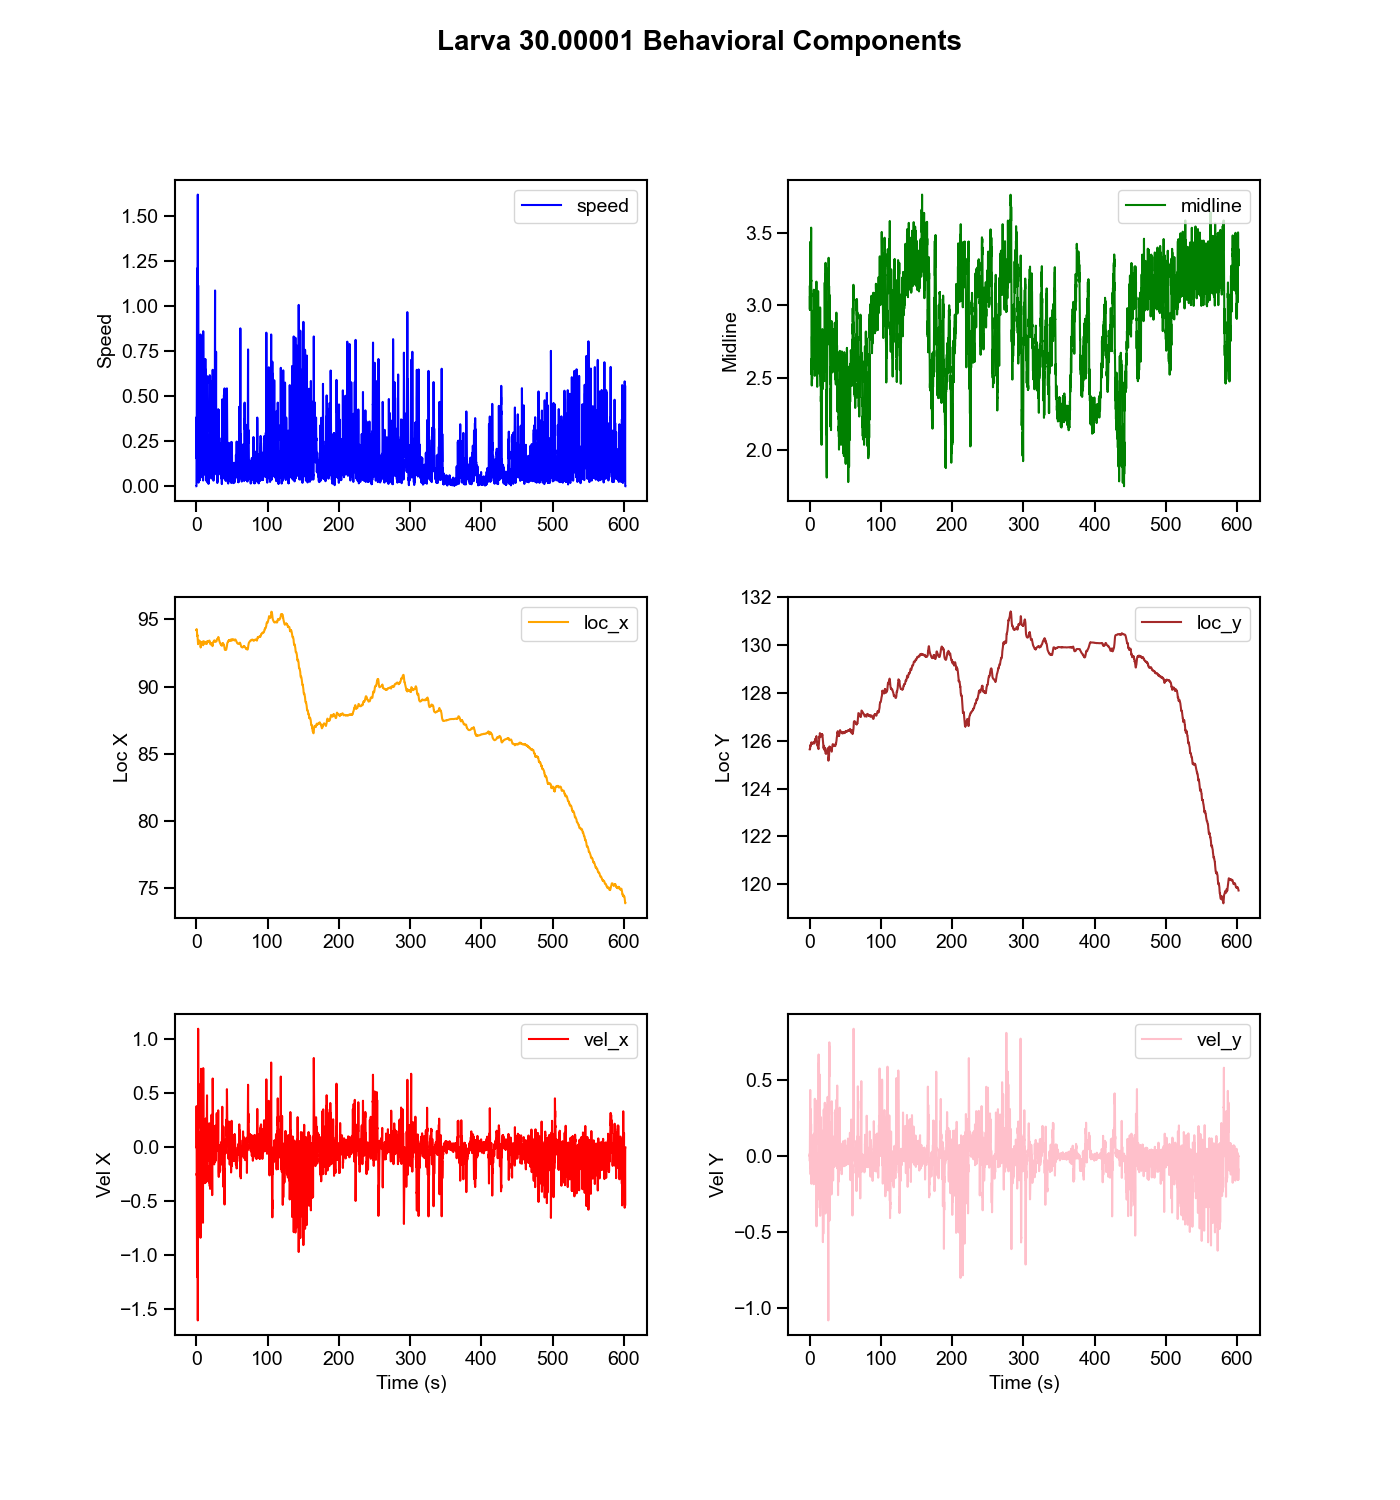

In [99]:
# # Plot specific columns
selected_columns = ["speed", "midline", "loc_x", "loc_y", "vel_x", "vel_y"]
data = larvae_data[larva_id]['data']
fig, axes = anm_plot.plot_larva_data(data=data, columns=selected_columns, larva_id=larva_id)

# # Plot all available columns
# fig, axes = anm_plot.plot_larva_data(larvae_data[larva_id]['data'], larva_id=larva_id)

plt.show()

## Single larva trajectory plots

FloatSlider(value=0.007, description='Time (s):', layout=Layout(width='1200px'), max=602.17, min=0.007, readou…

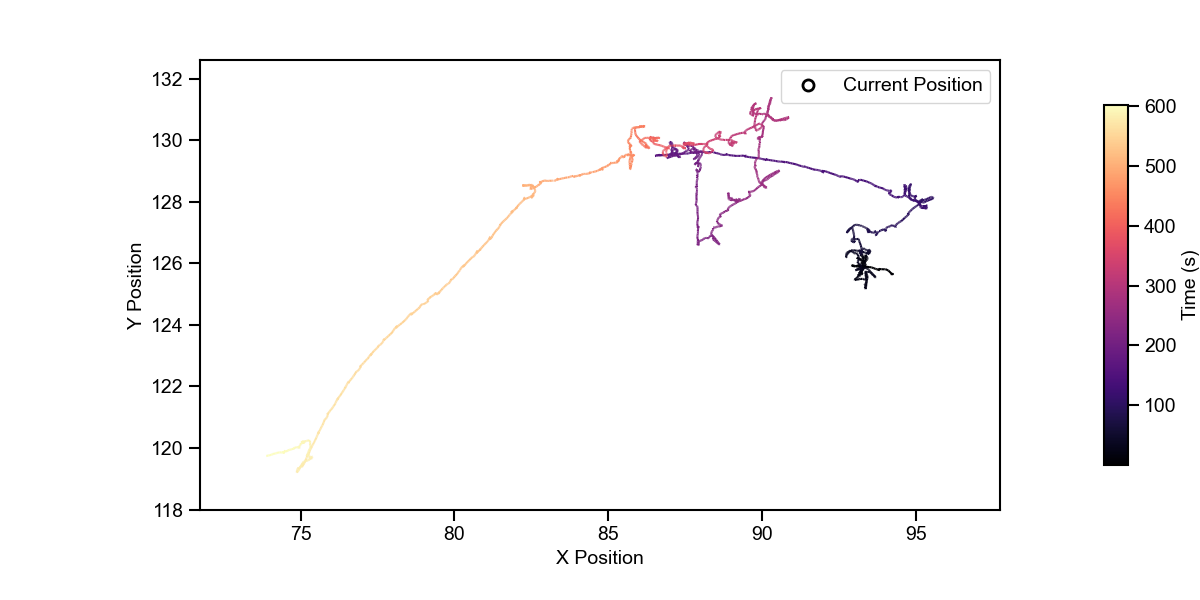

In [143]:
# Display interactive plot
anm_plot.plot_single_trajectory(larvae_data, larva_id)

## Multiple larva trajectory plots

FloatSlider(value=0.0, description='Time (s):', layout=Layout(width='960px'), max=602.17, readout_format='.1f'…

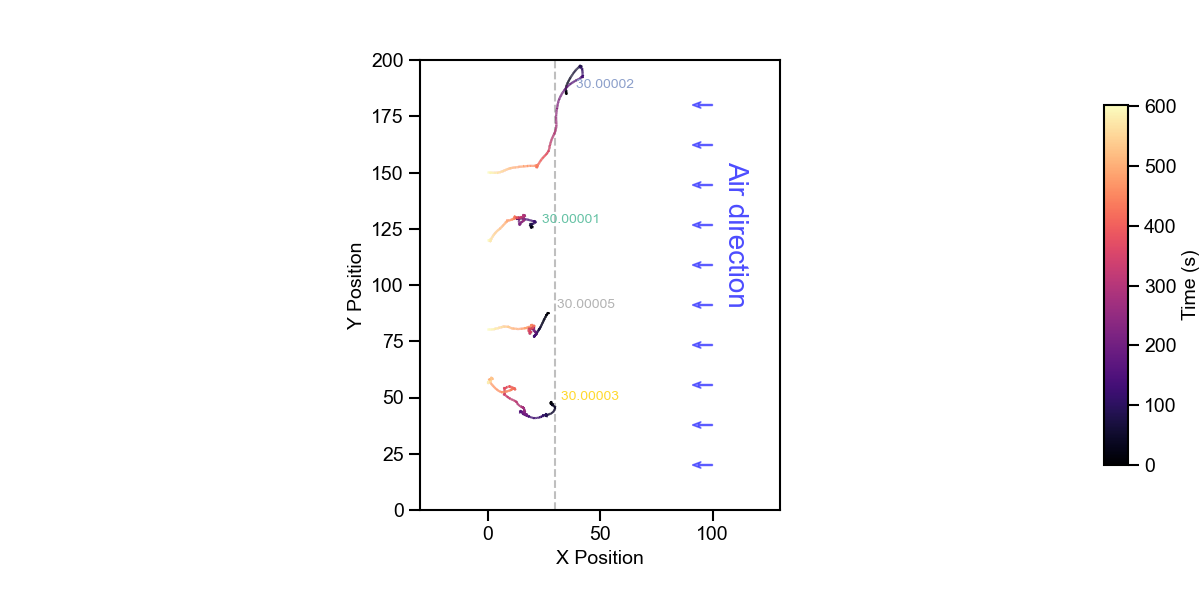

In [144]:
# # Plot all larvae
# plot_multiple_trajectories(larvae_data)

# Plot specific larvae
selected_larvae = ['30.00001', '30.00002', '30.00003','30.00005']
anm_plot.plot_multiple_trajectories(larvae_data, larva_ids=selected_larvae)

## K-means clustering on PCA dimension-reduced behaviour data

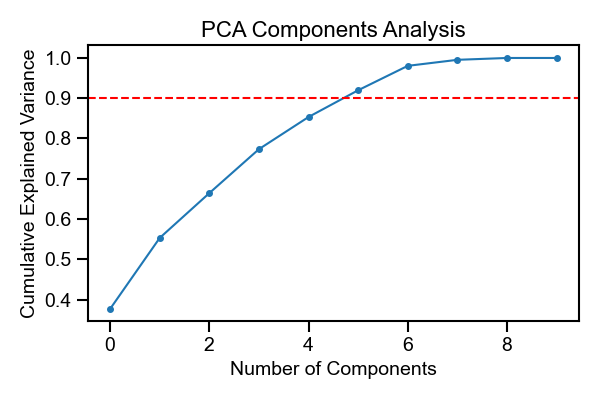

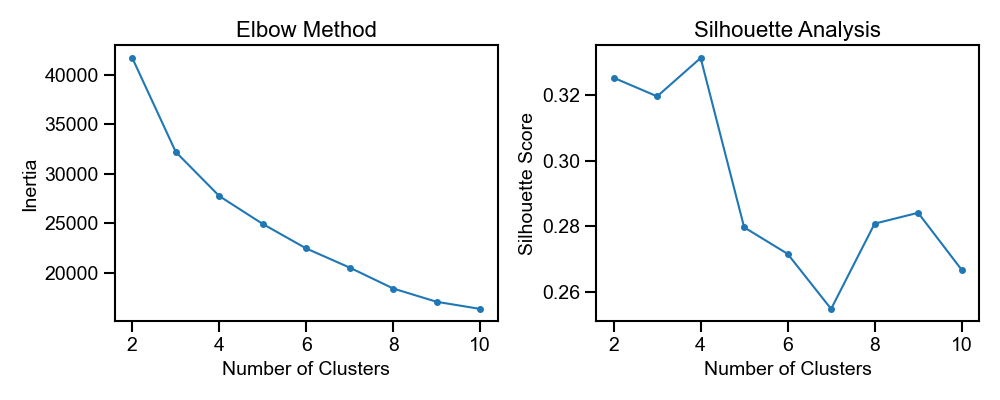

Optimal number of PCA components: 6
Optimal number of clusters: 4


In [164]:
clustered_data, optimal_components, optimal_clusters = anm_parse.cluster_behaviors(larvae_data[larva_id]["data"], variance_threshold=0.90, max_clusters=10)
print(f'Optimal number of PCA components: {optimal_components}')
print(f'Optimal number of clusters: {optimal_clusters}')

In [146]:
clustered_data

time  persistence  speed  midline   loc_x    loc_y  vel_x  vel_y  \
0       0.007        602.2  0.000    3.130  94.210  125.643  0.000  0.000   
1       0.062        602.2  0.000    3.088  94.219  125.655  0.000  0.000   
2       0.116        602.2  0.247    2.972  94.186  125.654  0.247  0.015   
3       0.171        602.2  0.384    3.032  94.252  125.649  0.382 -0.034   
4       0.226        602.2  0.231    2.972  94.262  125.647  0.229  0.028   
...       ...          ...    ...      ...     ...      ...    ...    ...   
7013  601.811        602.2  0.504    3.273  74.054  119.782 -0.478 -0.158   
7014  601.901        602.2  0.558    3.392  74.004  119.768 -0.539 -0.143   
7015  601.989        602.2  0.000    3.317  73.959  119.757  0.000  0.000   
7016  602.076        602.2  0.000    3.289  73.895  119.742  0.000  0.000   
7017  602.170        602.2  0.000    3.281  73.912  119.741  0.000  0.000   

      orient  pathlen  cluster     pca_1     pca_2     pca_3     pca_4  \
0      173.6    0.000        2  2.662935  0.445205 -0.180521 -0.829590   
1      173.2    0.000        2  2.686698  0.390985 -0.220193 -0.817779   
2      173.3    0.000        2  2.920024  0.569611  0.073767 -1.668280   
3      173.8    0.000        2  2.921890  0.872629  0.055262 -2.052598   
4      174.1    0.000        2  2.933485  0.547240  0.118974 -1.632565   
...      ...      ...      ...       ...       ...       ...       ...   
7013  -168.8   25.948        1 -5.066866  2.967738 -0.773049 -0.746400   
7014  -169.2   25.948        1 -5.150930  3.507885 -0.633360 -0.709129   
7015  -169.4   25.948        1 -4.706401 -0.574287  0.435362 -1.760770   
7016  -169.5   25.948        1 -4.699459 -0.609546  0.408290 -1.758904   
7017  -169.3   25.948        1 -4.693041 -0.619058  0.401188 -1.756587   

         pca_5     pca_6  
0     0.741830  1.661111  
1     0.687024  1.674863  
2     1.404118  1.089870  
3     2.157394  0.746921  
4     1.294696  1.129496  
...        ...       ...  
7013 -1.312138  0.690266  
7014 -1.427280  0.559032  
7015 -0.126019  1.274720  
7016 -0.164449  1.290958  
7017 -0.174233  1.295845  

[7018 rows x 17 columns]

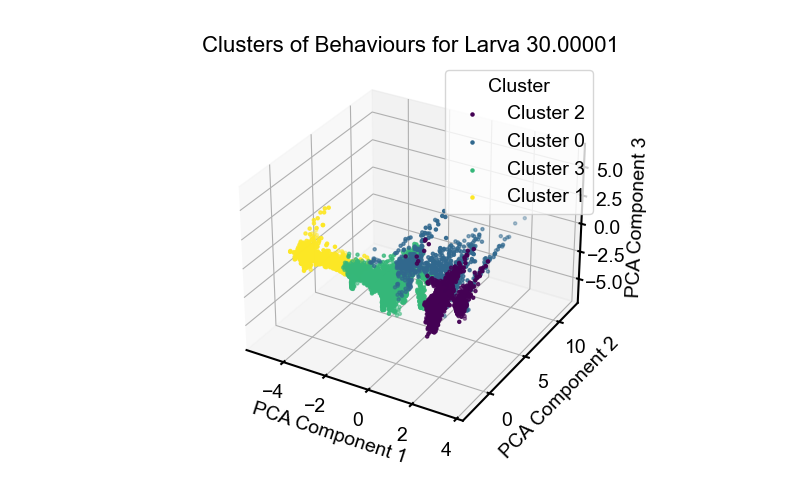

In [151]:
anm_plot.plot_clusters(clustered_data, larva_id, n_components=3)

FloatSlider(value=0.007, description='Time (s):', layout=Layout(width='1200px'), max=602.17, min=0.007, readou…

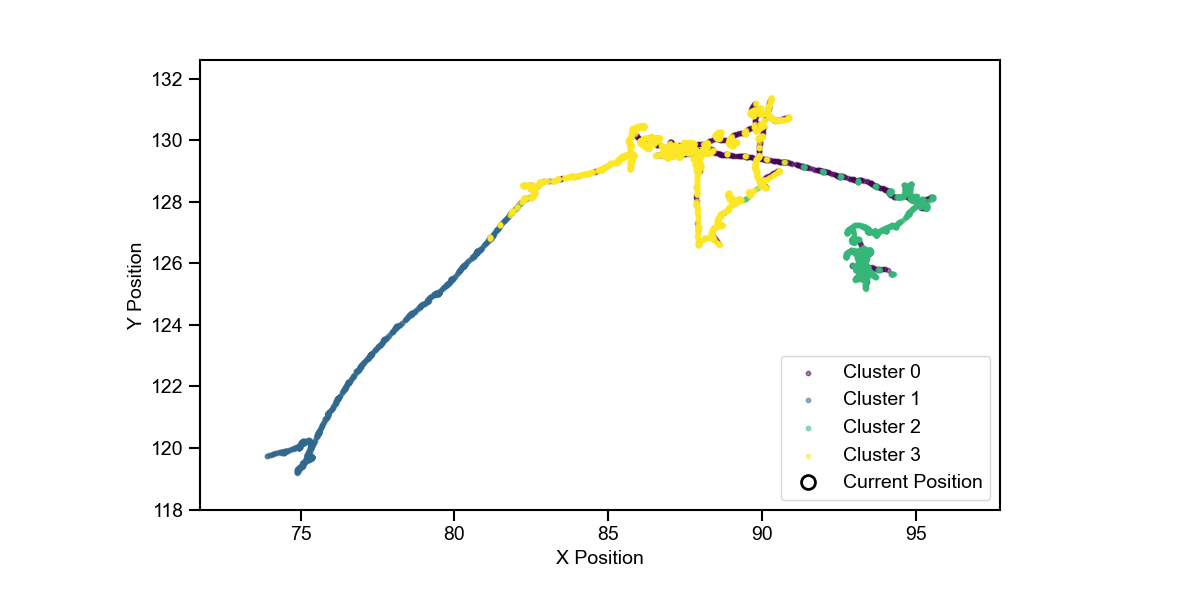

In [193]:
larva_id = '30.00001'
anm_plot.plot_trajectory_with_clusters(larvae_data[larva_id]["data"], clustered_data, larva_id)

## Calculation of $N_i$
Check the code in `parse_data.py` for calculation of $N_i$ along both X-axis and Y-axis

In [179]:
ni_dict_x = anm_parse.compute_navigational_index(larvae_data, ax="x")
ni_dict_y = anm_parse.compute_navigational_index(larvae_data, ax="y")
# for larva_id, ni in ni_dict_x.items():
#     print(f"Larva {larva_id} - Navigational Index: {ni['NI_mean']}, Normalized Navigational Index: {ni['NI_norm']}")

### Histogram mean X-axis and Y-axis $N_i$ across larvae

/Users/sharbat/Projects/anemotaxis/src/plot_data.py:440: RuntimeWarning: Mean of empty slice
  ni_means_x = np.array([x for x in [np.nanmean(df["NI"]) for df in ni_dict_x.values()]
/Users/sharbat/Projects/anemotaxis/src/plot_data.py:442: RuntimeWarning: Mean of empty slice
  ni_means_y = np.array([y for y in [np.nanmean(df["NI"]) for df in ni_dict_y.values()]


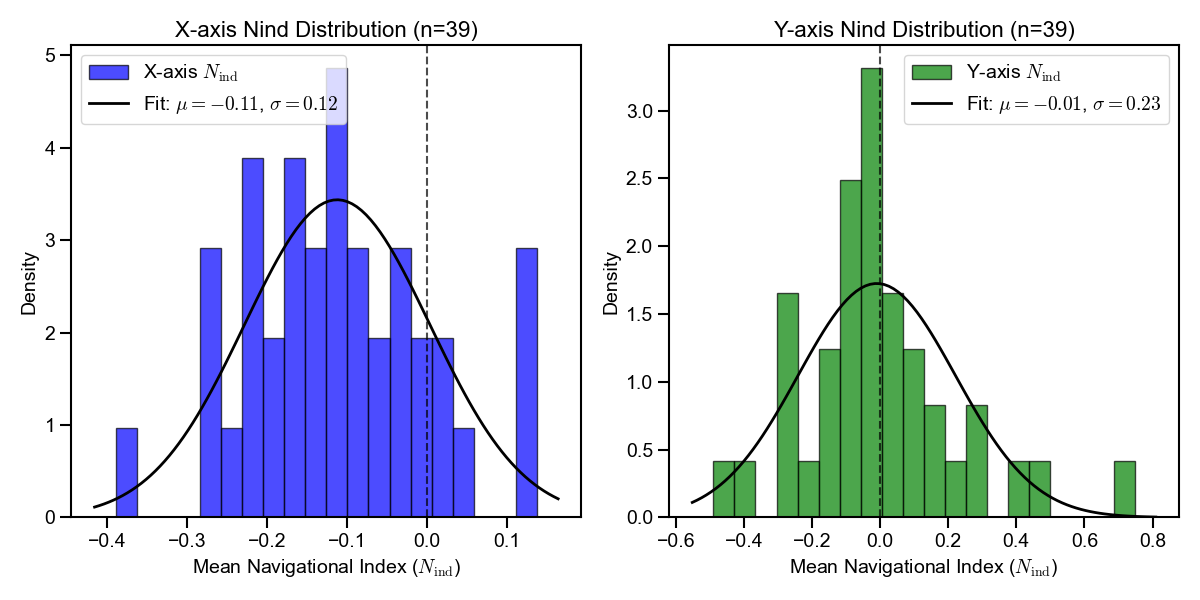

Summary Statistics:
X-axis - Mean: -0.11, Std: 0.12
Y-axis - Mean: -0.01, Std: 0.23


In [187]:
# Plot both x and y navigational indices
anm_plot.plot_navigational_indices_comparison(ni_dict_x, ni_dict_y, 
                                            bins=20, 
                                            density=True, 
                                            fit_distribution=True)

### Individual X- and Y-axis $N_i$ time-series 

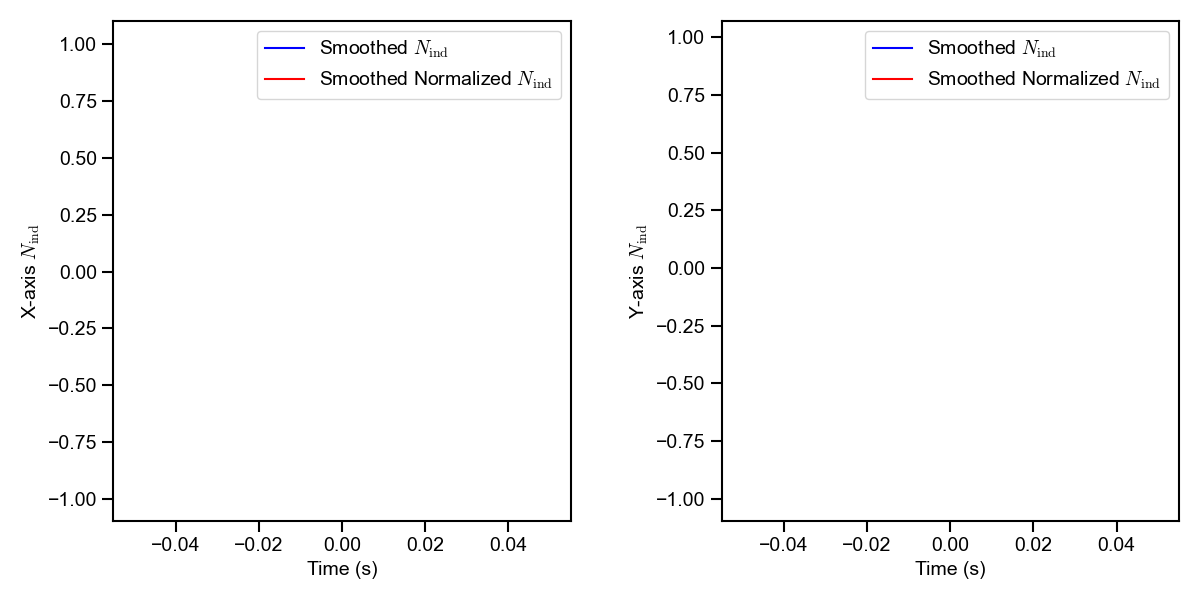

Processing larva 41/41
Video saved successfully!


In [188]:
# For interactive visualization
anm_plot.plot_ni_interactive(ni_dict_x, ni_dict_y)

# For saving animation
anm_plot.save_ni_animation(ni_dict_x, ni_dict_y, '../results/navigational_indices.mp4')

### Normalised X-axis $N_{ind}$ across individuals

/Users/sharbat/Projects/anemotaxis/src/plot_data.py:540: RuntimeWarning: Mean of empty slice
  mean_ni = np.nanmean(interpolated_ni, axis=0)
/Users/sharbat/miniconda3/envs/anemotaxis/lib/python3.10/site-packages/numpy/lib/_nanfunctions_impl.py:2019: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


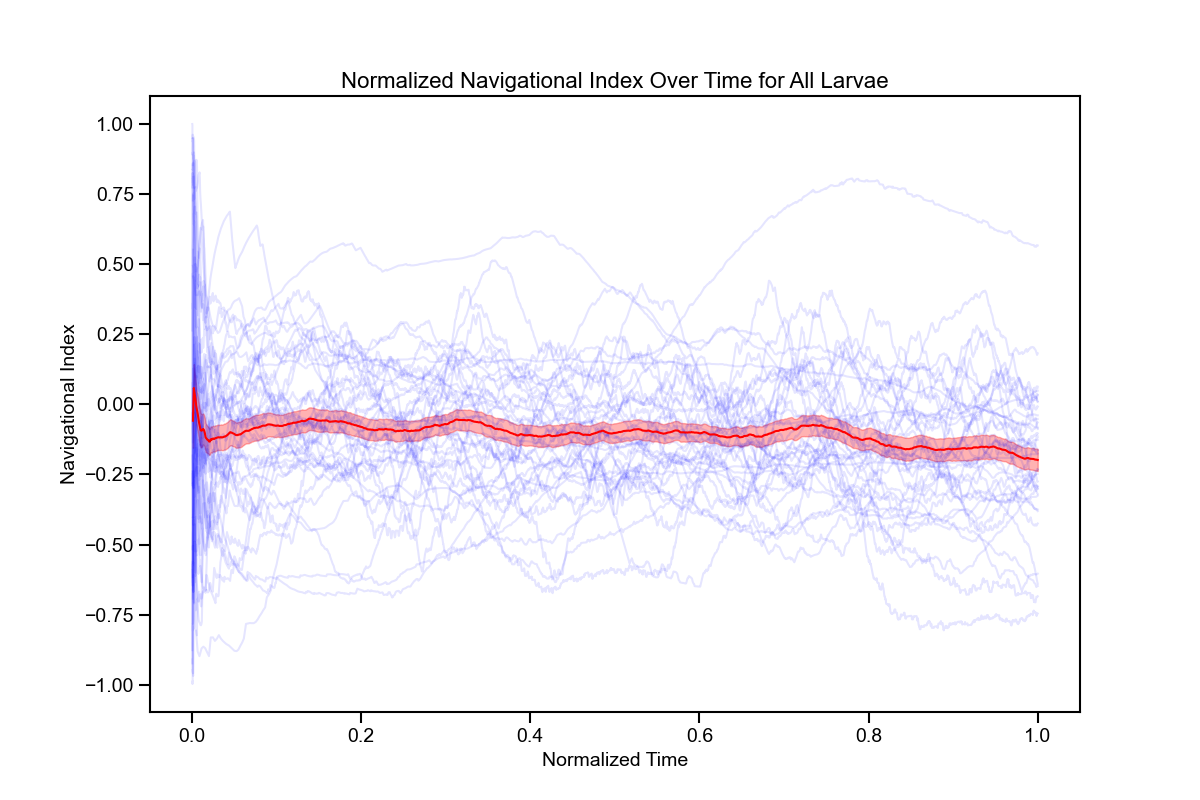

In [189]:
window_size = 500
anm_plot.plot_normalized_navigational_index_time_series(ni_dict_x, window_size=window_size)

/Users/sharbat/Projects/anemotaxis/src/plot_data.py:580: RuntimeWarning: Mean of empty slice
  mean_ni = np.nanmean(interpolated_ni, axis=0)


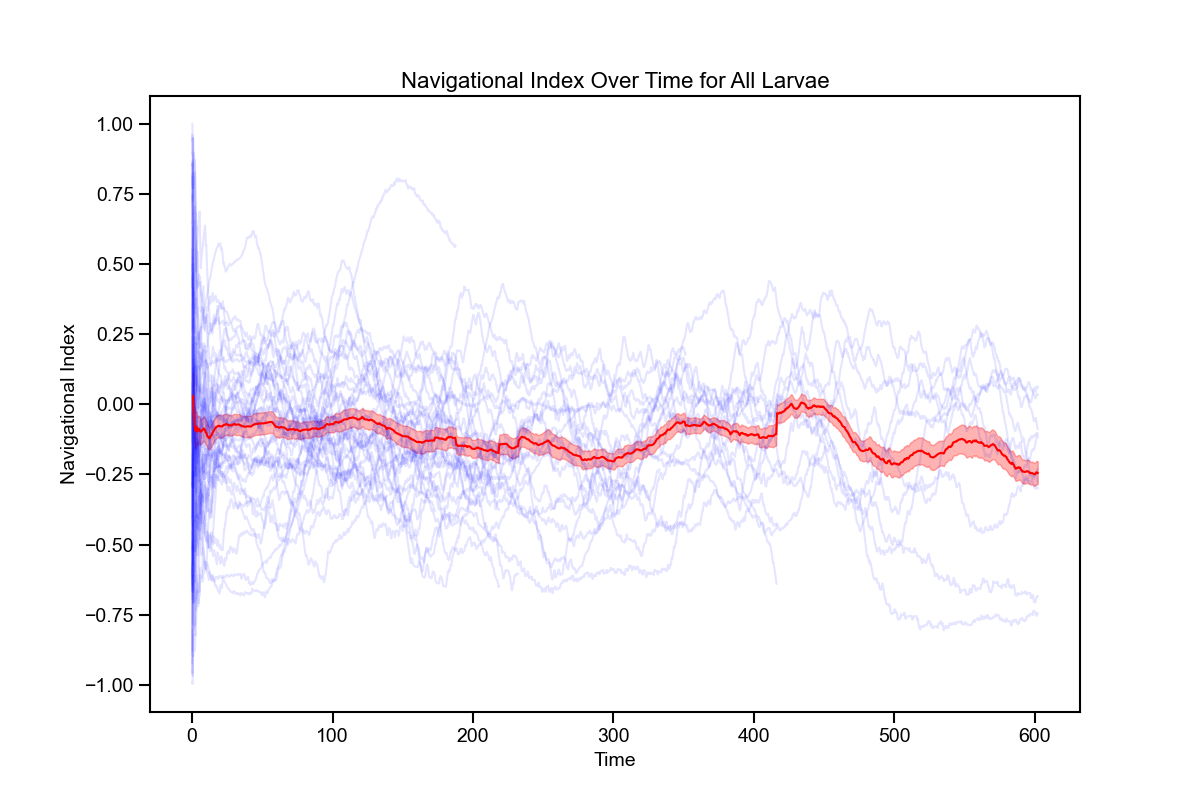

In [190]:
anm_plot.plot_navigational_index_time_series_together(ni_dict_x, window_size=window_size)

### Normalised Y-axis $N_{ind}$ across individuals

/Users/sharbat/Projects/anemotaxis/src/plot_data.py:540: RuntimeWarning: Mean of empty slice
  mean_ni = np.nanmean(interpolated_ni, axis=0)
/Users/sharbat/miniconda3/envs/anemotaxis/lib/python3.10/site-packages/numpy/lib/_nanfunctions_impl.py:2019: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


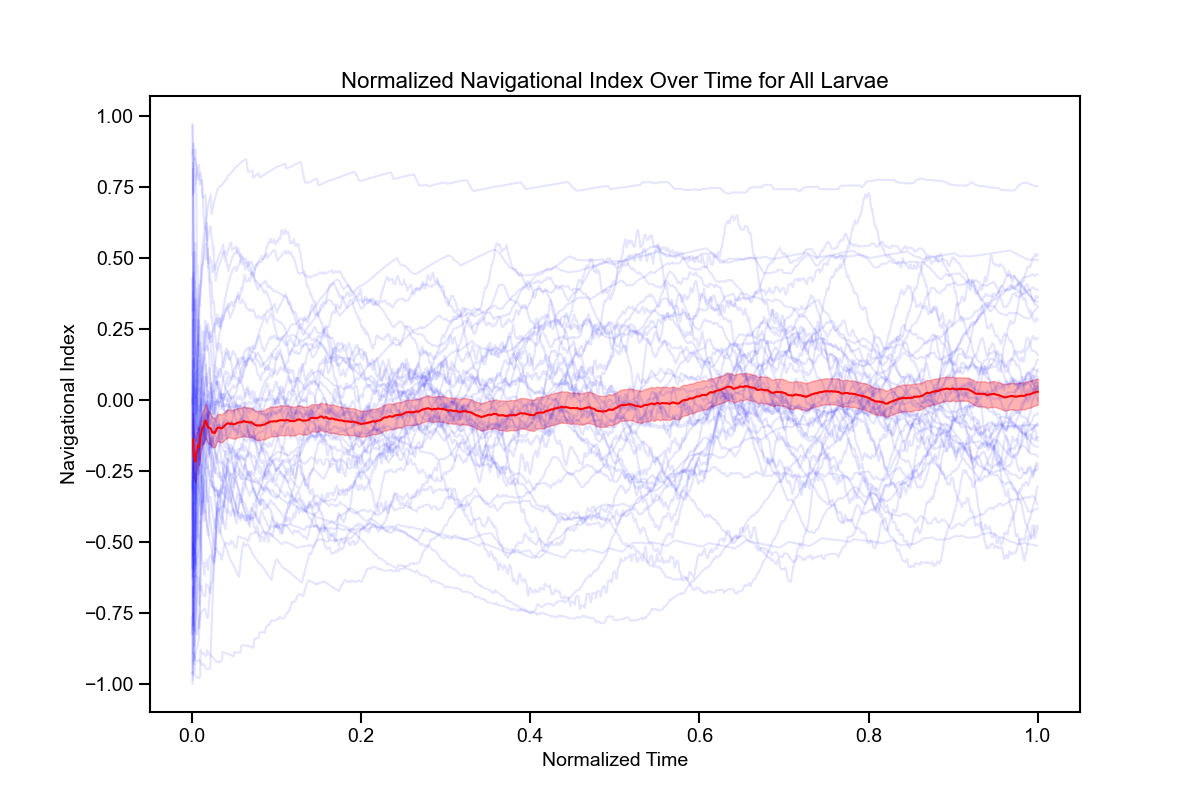

In [191]:
window_size = 500
anm_plot.plot_normalized_navigational_index_time_series(ni_dict_y, window_size=window_size)

/Users/sharbat/Projects/anemotaxis/src/plot_data.py:580: RuntimeWarning: Mean of empty slice
  mean_ni = np.nanmean(interpolated_ni, axis=0)


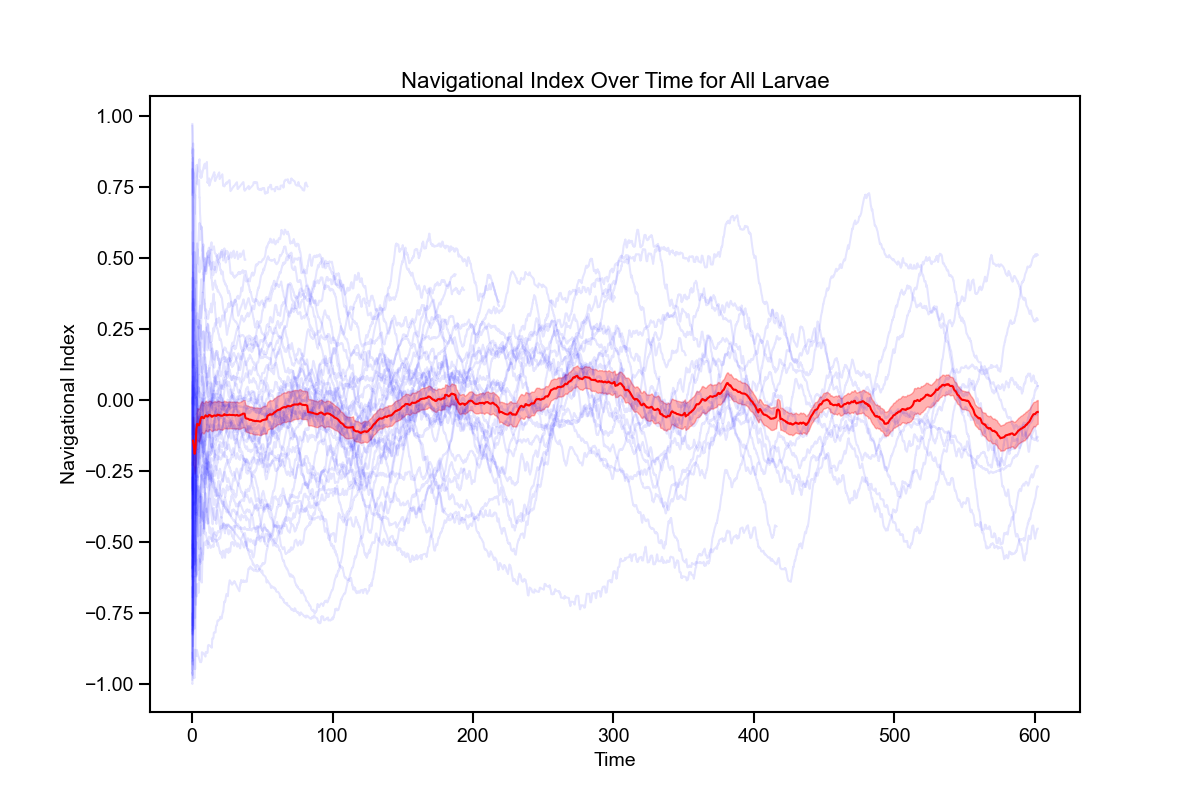

In [192]:
anm_plot.plot_navigational_index_time_series_together(ni_dict_y, window_size=window_size)

## Discussion, TO DO
- Test how each larvae (or track) moves across time
- Write unit tests

# Part II : Analysing via `trx.mat` data

In [38]:
# trx_path = "/Users/sharbat/Projects/anemotaxis/data/20240219_140808/trx.mat"
# trx_sharbat = anm_parse.import_trx_sharbat(trx_path)
# trx_tim = anm_parse.import_trx(trx_path)

In [45]:
import h5py
def print_trx_structure(filepath):
    """
    Print the detailed structure of 'trx' group in a .mat file including nested references.
    
    Args:
        filepath (str): Path to the .mat file
    """
    with h5py.File(filepath, 'r') as f:
        print("\n=== TRX Structure ===")
        if 'trx' not in f:
            print("No 'trx' group found in file")
            return
            
        trx = f['trx']
        
        def explore_reference(obj):
            """Helper function to explore object references"""
            if isinstance(obj, h5py.Reference):
                referenced_obj = f[obj]
                if isinstance(referenced_obj, h5py.Dataset):
                    return f"Referenced Dataset - Shape: {referenced_obj.shape}, Type: {referenced_obj.dtype}"
                else:
                    return "Referenced Group"
            return None
        
        # Print all fields in trx
        for field_name, field_obj in trx.items():
            print(f"\n=== {field_name} ===")
            
            # Handle dataset case
            if isinstance(field_obj, h5py.Dataset):
                print(f"Shape: {field_obj.shape}")
                print(f"Type: {field_obj.dtype}")
                
                # If it's an array of objects, explore each element
                if field_obj.dtype == np.dtype('object'):
                    for i in range(min(field_obj.shape[0], 5)):  # Look at first 5 elements
                        try:
                            ref_info = explore_reference(field_obj[i])
                            if ref_info:
                                print(f"Element {i}: {ref_info}")
                        except Exception as e:
                            print(f"Could not explore element {i}: {str(e)}")
            
            # Handle group case
            elif isinstance(field_obj, h5py.Group):
                print("Group containing:")
                for subfield_name, subfield_obj in field_obj.items():
                    print(f"  └── {subfield_name}")
                    print(f"      ├── Shape: {subfield_obj.shape}")
                    print(f"      └── Type: {subfield_obj.dtype}")


In [317]:


# Use the function
# path = "/Users/sharbat/Projects/anemotaxis/data/20240219_140808/trx.mat"
path = "/Users/sharbat/Projects/anemotaxis/data/20240308_124423/trx.mat" #CONTROL 'FCF_attP2-40'
# path = "/Users/sharbat/Projects/anemotaxis/data/20240308_115957/trx.mat" #SS01948
# path = "/Users/sharbat/Projects/anemotaxis/data/20240308_125815/trx.mat" #SS01696
# path = "/Users/sharbat/Projects/anemotaxis/data/20240308_131239/trx.mat" #MB143b

# print_trx_structure(path)


In [318]:
def import_trx(path):
    """Import trx file and calculate behavior durations.
    
    Handles -1/1 encoded behaviors and calculates durations for all behavioral states
    including their variations (large, strong, weak).
    
    Args:
        path (str): Path to the .trx file
    Returns:
        dict: Data dictionary with behavior durations
    """
    with h5py.File(path, 'r') as f:
        fields = list(f['trx'].keys())
        trx_extracted = {}
        
        nb_larvae = f['trx'][fields[0]].shape[1]
        print(f"Number of larvae: {nb_larvae}")
        
        # Define all behavior types
        base_behaviors = ['run', 'cast', 'back', 'hunch', 'roll', 'stop']
        behavior_variants = ['', '_large', '_strong', '_weak']
        behaviors = [f"{b}{v}" for b in base_behaviors for v in behavior_variants]
        
        for i in range(nb_larvae):
            larva = {}
            for field in fields:
                try:
                    ref = f['trx'][field][0][i]
                    data = np.array(f[ref])
                    data = data.tolist()
                    data = data[0] if len(data) == 1 else data
                    larva[field] = data
                except Exception as e:
                    print(f"Warning: Could not process field '{field}' for larva {i}: {str(e)}")
                    larva[field] = None
            
            # Calculate number of timesteps
            larva["nb_timestep"] = len(larva["t"]) if "t" in larva else 0
            
            # Calculate durations for all behavioral states
            for behavior in behaviors:
                if behavior in larva and larva[behavior] is not None:
                    # Convert -1/1 to 0/1 and sum
                    behavior_data = np.array(larva[behavior])
                    active_frames = np.sum((behavior_data + 1) / 2)
                    total_frames = len(behavior_data)
                    
                    # Store both absolute and relative durations
                    larva[f"{behavior}_duration"] = active_frames
                    larva[f"{behavior}_fraction"] = active_frames / total_frames if total_frames > 0 else 0
                else:
                    larva[f"{behavior}_duration"] = 0
                    larva[f"{behavior}_fraction"] = 0
            
            # Calculate total active time (any behavior)
            all_behaviors = [b for b in behaviors if b in larva and larva[b] is not None]
            if all_behaviors:
                behavior_arrays = [(np.array(larva[b]) + 1) / 2 for b in all_behaviors]
                total_active = np.maximum.reduce(behavior_arrays)
                larva['total_active_duration'] = np.sum(total_active)
                larva['total_active_fraction'] = np.mean(total_active)
            
            # Extract larva ID
            larva_id = larva.pop("numero_larva_num") if "numero_larva_num" in larva else i
            if isinstance(larva_id, list):
                larva_id = "_".join(map(str, larva_id))
            
            trx_extracted[str(larva_id)] = larva
            
            # Print summary for this larva
            print(f"\nLarva {larva_id} behavior durations:")
            for behavior in base_behaviors:
                if f"{behavior}_duration" in larva:
                    print(f"{behavior}: {larva[f'{behavior}_duration']:.1f} frames "
                          f"({larva[f'{behavior}_fraction']:.1%} of time)")

    return {"data": trx_extracted}

# Example usage:
# path = "/Users/sharbat/Projects/anemotaxis/data/20240219_140808/trx.mat"
trx_data = import_trx(path)

Number of larvae: 39

Larva 1.0 behavior durations:
run: 3529.0 frames (32.9% of time)
cast: 6072.0 frames (56.6% of time)
back: 110.0 frames (1.0% of time)
hunch: 27.0 frames (0.3% of time)
roll: 0.0 frames (0.0% of time)
stop: 997.0 frames (9.3% of time)

Larva 3.0 behavior durations:
run: 899.0 frames (8.4% of time)
cast: 6186.0 frames (57.6% of time)
back: 98.0 frames (0.9% of time)
hunch: 7.0 frames (0.1% of time)
roll: 0.0 frames (0.0% of time)
stop: 3545.0 frames (33.0% of time)

Larva 7.0 behavior durations:
run: 2003.0 frames (25.5% of time)
cast: 2745.0 frames (34.9% of time)
back: 127.0 frames (1.6% of time)
hunch: 24.0 frames (0.3% of time)
roll: 0.0 frames (0.0% of time)
stop: 2971.0 frames (37.8% of time)

Larva 9.0 behavior durations:
run: 3704.0 frames (34.5% of time)
cast: 4389.0 frames (40.9% of time)
back: 98.0 frames (0.9% of time)
hunch: 15.0 frames (0.1% of time)
roll: 0.0 frames (0.0% of time)
stop: 2529.0 frames (23.6% of time)

Larva 10.0 behavior durations:
ru

In [319]:
def print_trx_structure(trx_data):
    """Print the hierarchical structure of trx_data with shapes for all larvae."""
    
    def get_shape(item):
        if isinstance(item, (list, np.ndarray)):
            return f"Shape: {np.array(item).shape}"
        return "Shape: scalar"

    print("trx_data/")
    print("└── data/")
    
    # Iterate through all larvae
    for larva_id, larva_data in trx_data['data'].items():
        print(f"    ├── Larva {larva_id}/")
        # Sort keys for consistent output
        for key in sorted(larva_data.keys()):
            is_last = key == sorted(larva_data.keys())[-1]
            prefix = '        └──' if is_last else '        ├──'
            print(f"{prefix} {key}: {get_shape(larva_data[key])}")

# Use the function
print_trx_structure(trx_data)

trx_data/
└── data/
    ├── Larva 1.0/
        ├── As_smooth_5: Shape: (10735,)
        ├── S: Shape: (10735,)
        ├── S_deriv_smooth_5: Shape: (10735,)
        ├── S_smooth_5: Shape: (10735,)
        ├── angle_downer_upper_deriv_smooth_5: Shape: (10735,)
        ├── angle_downer_upper_smooth_5: Shape: (10735,)
        ├── angle_upper_lower_deriv_smooth_5: Shape: (10735,)
        ├── angle_upper_lower_smooth_5: Shape: (10735,)
        ├── back: Shape: (10735,)
        ├── back_duration: Shape: scalar
        ├── back_fraction: Shape: scalar
        ├── back_large: Shape: (10735,)
        ├── back_large_duration: Shape: scalar
        ├── back_large_fraction: Shape: scalar
        ├── back_strong: Shape: (10735,)
        ├── back_strong_duration: Shape: scalar
        ├── back_strong_fraction: Shape: scalar
        ├── back_weak: Shape: (10735,)
        ├── back_weak_duration: Shape: scalar
        ├── back_weak_fraction: Shape: scalar
        ├── ball_proba: Shape: (10735,)
       

In [320]:
# Get list of all larvae IDs
larvae_ids = sorted(trx_data['data'].keys())
print("Available larvae IDs:")
print(larvae_ids)

Available larvae IDs:
['1.0', '10.0', '11.0', '110.0', '1156.0', '1157.0', '12.0', '13.0', '15.0', '16.0', '169.0', '18.0', '20.0', '21.0', '23.0', '24.0', '265.0', '28.0', '29.0', '3.0', '31.0', '32.0', '409.0', '48.0', '49.0', '506.0', '52.0', '530.0', '531.0', '535.0', '536.0', '559.0', '574.0', '575.0', '7.0', '711.0', '791.0', '833.0', '9.0']


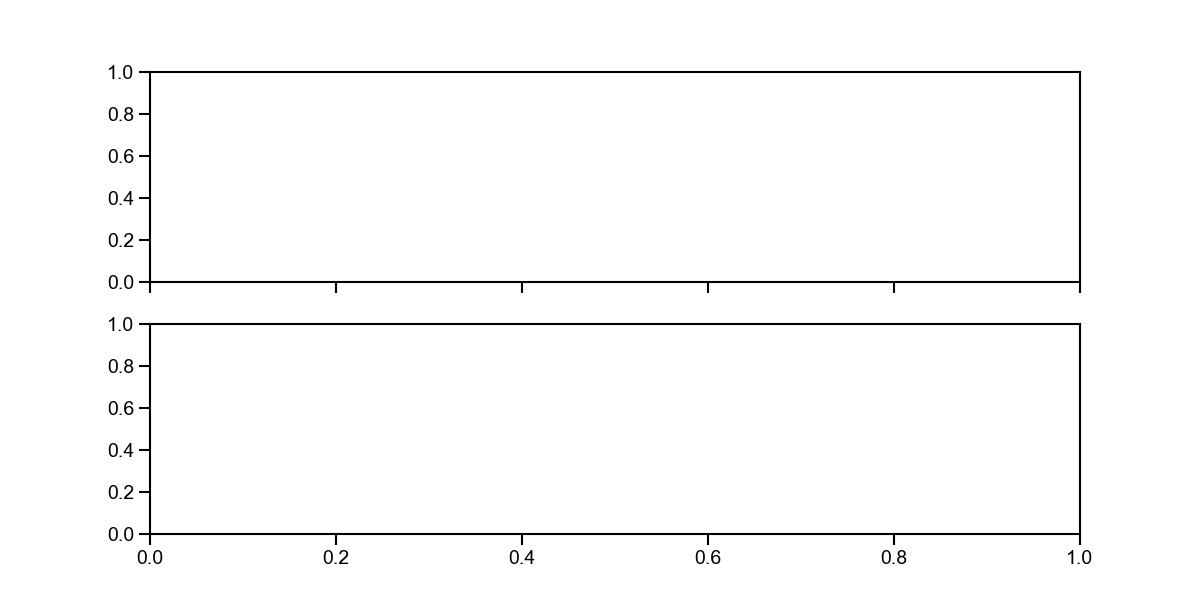

In [156]:
def plot_behaviors_two_panels(trx_data):
    """Plot behavioral states in two panels with interactive slider control."""
    plt.ioff()
    
    larva_ids = sorted(trx_data['data'].keys())
    
    # Create figure with two subplots
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 6), sharex=True)
    
    # Define colors for behaviors
    run_cast_colors = {
        # Run behaviors - Red family
        # 'run': 'b',
        'run_large': 'b',
        'run_strong': 'r',
        # Cast behaviors - Blue family
        # 'cast': '#377eb8',
        # 'cast_large': '#7fb5d6',
        # 'cast_strong': '#00008b'
        
    }
    
    other_colors = {
        # Back behaviors - Green family
        'back': '#4daf4a',
        'back_large': '#90ee90',
        'back_strong': '#006400',
        # Hunch behaviors - Purple family
        'hunch': '#984ea3',
        'hunch_large': '#dda0dd',
        'hunch_strong': '#4b0082',
        # Roll behaviors - Orange family
        'roll': '#ff7f00',
        'roll_large': '#ffa500',
        'roll_strong': '#8b4513',
        # Stop behaviors - Gray family
        'stop': '#666666',
        'stop_large': '#a9a9a9',
        'stop_strong': '#1a1a1a'
    }
    
    # Create interactive controls
    play = widgets.Play(
        value=0,
        min=0,
        max=len(larva_ids) - 1,
        step=1,
        interval=500,
        description="Play"
    )
    
    slider = widgets.IntSlider(
        min=0,
        max=len(larva_ids) - 1,
        description='Larva:',
        value=0,
        style={'description_width': 'initial'},
        readout_format='d',
        layout=widgets.Layout(width='1000px')
    )
    
    widgets.jslink((play, 'value'), (slider, 'value'))
    
    def plot_behaviors(ax, behaviors_dict, data, time):
        """Helper function to plot behaviors on a given axis"""
        for behavior, color in behaviors_dict.items():
            if behavior in data:
                # Normalize from [-1,1] to [0,1]
                behavior_data = (np.array(data[behavior]) + 1) / 2
                mask = behavior_data > 0.5
                
                edges = np.diff(mask.astype(int))
                starts = np.where(edges == 1)[0] + 1
                ends = np.where(edges == -1)[0] + 1
                
                if mask[0]: starts = np.r_[0, starts]
                if mask[-1]: ends = np.r_[ends, len(mask)-1]
                
                for start, end in zip(starts, ends):
                    ax.axvspan(time[start], time[end], 
                             color=color, alpha=0.3,
                             label=behavior.replace('_', ' ').title() if start == starts[0] else "")
    
    def update_plot(change):
        if change['type'] == 'change' and change['name'] == 'value':
            ax1.clear()
            ax2.clear()
            
            larva_id = larva_ids[change['new']]
            time = np.array(trx_data['data'][larva_id]['t'])
            
            # Plot run/cast behaviors
            plot_behaviors(ax1, run_cast_colors, trx_data['data'][larva_id], time)
            ax1.set_title('Run and Cast Behaviours')
            ax1.set_yticks([])
            ax1.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
            
            # Plot other behaviors
            plot_behaviors(ax2, other_colors, trx_data['data'][larva_id], time)
            ax2.set_title('Other Behaviours')
            ax2.set_xlabel('Time (s)')
            ax2.set_yticks([])
            ax2.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
            
            # Set common properties
            for ax in [ax1, ax2]:
                ax.set_ylim(0, 1)
            
            plt.suptitle(f'Behavioural States - Larva {larva_id}', y=1.0, fontsize=14)
            plt.tight_layout()
            fig.canvas.draw_idle()
    
    slider.observe(update_plot)
    
    display(widgets.HBox([play, slider]))
    display(fig.canvas)
    
    update_plot({'type': 'change', 'name': 'value', 'new': 0})

# Use the function
plot_behaviors_two_panels(trx_data)

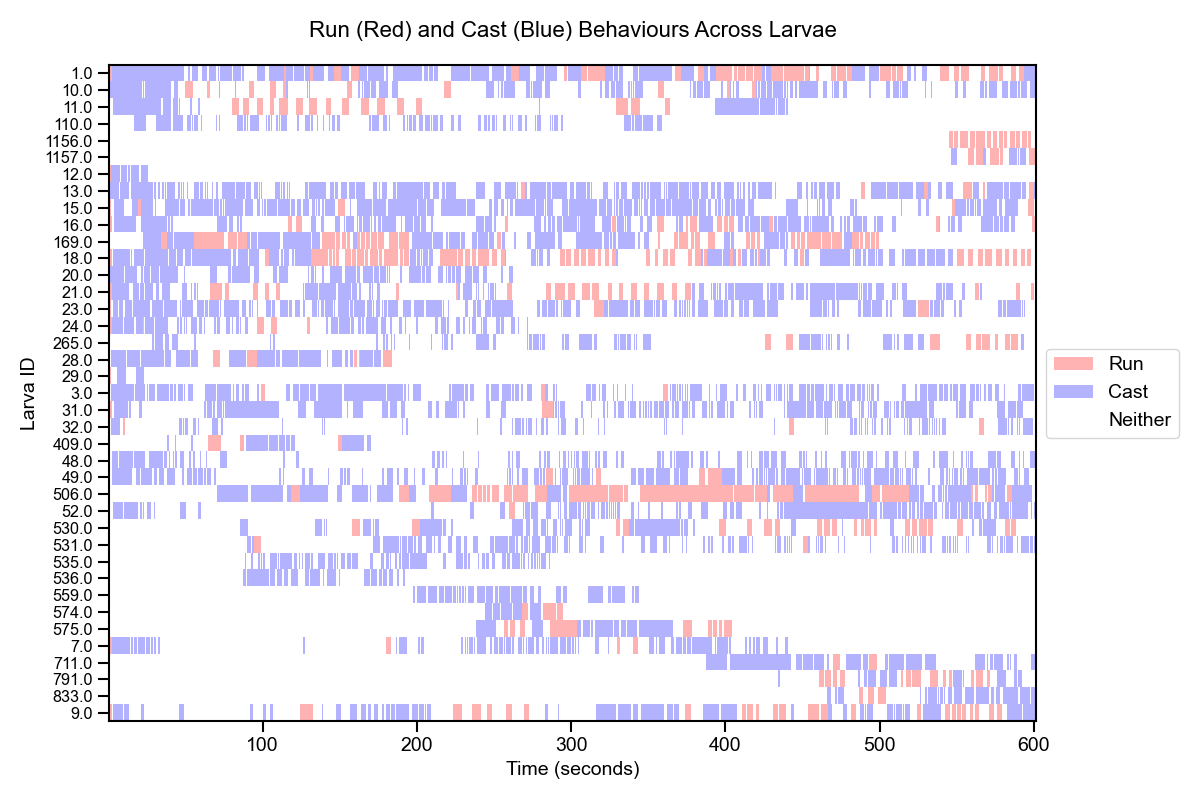

In [321]:
def plot_behavior_matrix(trx_data):
    """Plot run and cast behaviours in a single matrix with one row per larva."""
    
    # Get sorted larva IDs
    larva_ids = sorted(trx_data['data'].keys())
    
    # Create figure
    plt.figure(figsize=(12, 8))
    
    # Find time range
    min_time = min(min(trx_data['data'][lid]['t']) for lid in larva_ids)
    max_time = max(max(trx_data['data'][lid]['t']) for lid in larva_ids)
    
    # Create matrix for behaviors
    n_larvae = len(larva_ids)
    
    # Create a masked array to handle missing data points
    behavior_matrix = np.full((n_larvae, 1000, 3), fill_value=1.0)  # White background
    
    # Fill matrix with behavioral states
    for i, larva_id in enumerate(larva_ids):
        larva_time = np.array(trx_data['data'][larva_id]['t'])
        run_data = (np.array(trx_data['data'][larva_id]['run_large']) + 1) / 2
        cast_data = (np.array(trx_data['data'][larva_id]['cast_large']) + 1) / 2
        
        # Normalize time to indices
        time_indices = ((larva_time - min_time) / (max_time - min_time) * 999).astype(int)
        
        # Set colors directly at time points
        for t_idx, (run, cast) in zip(time_indices, zip(run_data, cast_data)):
            if run > 0.5:  # Run behavior
                behavior_matrix[i, t_idx] = [1, 0.7, 0.7]  # Light red
            elif cast > 0.5:  # Cast behavior
                behavior_matrix[i, t_idx] = [0.7, 0.7, 1]  # Light blue
            else:  # Neither
                behavior_matrix[i, t_idx] = [1, 1, 1]  # White
    
    # Plot matrix
    plt.imshow(behavior_matrix, aspect='auto', interpolation='nearest',
               extent=[min_time, max_time, n_larvae, 0])
    
    # Set y-axis labels
    plt.yticks(np.arange(0.5, n_larvae + 0.5), larva_ids, fontsize='small')
    
    # Customize plot
    plt.title('Run (Red) and Cast (Blue) Behaviours Across Larvae', pad=20)
    plt.xlabel('Time (seconds)')
    plt.ylabel('Larva ID')
    
    # Create custom legend patches
    from matplotlib.patches import Patch
    legend_elements = [
        Patch(facecolor=(1, 0.7, 0.7), label='Run'),
        Patch(facecolor=(0.7, 0.7, 1), label='Cast'),
        Patch(facecolor=(1, 1, 1), label='Neither')
    ]
    plt.legend(handles=legend_elements, loc='center left', bbox_to_anchor=(1, 0.5))
    
    plt.tight_layout()
    plt.show()

# Generate visualization
plot_behavior_matrix(trx_data)

In [188]:
def plot_behaviors_and_save_video(trx_data, output_path='larva_behaviours.mp4', fps=2):
    """Plot behavioural states and save as video."""
    plt.ioff()
    larva_ids = sorted(trx_data['data'].keys())
    
    # Create figure with two subplots
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 6))
    
    # Define color schemes for both panels
    run_cast_colors = {
        'run': '#e41a1c',
        'run_large': '#ff7f7f',
        'run_strong': '#8b0000',
        'cast': '#377eb8',
        'cast_large': '#7fb5d6',
        'cast_strong': '#00008b'
    }
    
    other_colors = {
        'back': '#4daf4a',
        'back_large': '#90ee90',
        'back_strong': '#006400',
        'hunch': '#984ea3',
        'hunch_large': '#dda0dd',
        'hunch_strong': '#4b0082',
        'roll': '#ff7f00',
        'roll_large': '#ffa500',
        'roll_strong': '#8b4513',
        'stop': '#666666',
        'stop_large': '#a9a9a9',
        'stop_strong': '#1a1a1a'
    }
    
    def plot_behaviors(ax, behaviors_dict, data, time):
        """Helper function to plot behaviours on a given axis"""
        for behavior, color in behaviors_dict.items():
            if behavior in data:
                behavior_data = (np.array(data[behavior]) + 1) / 2
                mask = behavior_data > 0.5
                
                edges = np.diff(mask.astype(int))
                starts = np.where(edges == 1)[0] + 1
                ends = np.where(edges == -1)[0] + 1
                
                if mask[0]: starts = np.r_[0, starts]
                if mask[-1]: ends = np.r_[ends, len(mask)-1]
                
                for start, end in zip(starts, ends):
                    ax.axvspan(time[start], time[end], 
                             color=color, alpha=0.3,
                             label=behavior.replace('_', ' ').title() if start == starts[0] else "")
    
    # Set up the video writer
    writer = animation.FFMpegWriter(fps=fps)
    
    # Create directory if it doesn't exist
    os.makedirs(os.path.dirname(output_path), exist_ok=True)
    
    with writer.saving(fig, output_path, dpi=100):
        for idx, larva_id in enumerate(larva_ids):
            ax1.clear()
            ax2.clear()
            
            time = np.array(trx_data['data'][larva_id]['t'])
            
            # Plot both behavior panels
            plot_behaviors(ax1, run_cast_colors, trx_data['data'][larva_id], time)
            plot_behaviors(ax2, other_colors, trx_data['data'][larva_id], time)
            
            # Set panel properties
            ax1.set_title('Run and Cast Behaviours')
            ax2.set_title('Other Behaviours')
            ax2.set_xlabel('Time (s)')
            
            # Remove y-ticks from both panels
            ax1.set_yticks([])
            ax2.set_yticks([])
            
            # Add legends
            ax1.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
            ax2.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
            
            # Set y-axis limits
            ax1.set_ylim(0, 1)
            ax2.set_ylim(0, 1)
            
            plt.suptitle(f'Behavioural States - Larva {larva_id}', y=1.0, fontsize=14)
            plt.tight_layout()
            
            writer.grab_frame()
            print(f"Processing larva {idx+1}/{len(larva_ids)}", end='\r')
        
        print("\nVideo saved successfully!")

# Required imports
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation

# Install ffmpeg if needed:
# In terminal: brew install ffmpeg

# Generate the video
plot_behaviors_and_save_video(trx_data, '../results/larva_behaviors.mp4', fps=2)

/var/folders/qs/_71td1zx7kjd4t5xhw9wndn00000gp/T/ipykernel_27762/1496346569.py:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 6))


Processing larva 10/10
Video saved successfully!


In [193]:
    # behaviors = {
    #     'run': '#e41a1c',
    #     'run_large': '#ff7f7f',
    #     'run_strong': '#8b0000',
    #     'cast': '#377eb8',
    #     'cast_large': '#7fb5d6',
    #     'cast_strong': '#00008b',
    #     # 'back': '#4daf4a',
    #     # 'back_large': '#90ee90',
    #     # 'back_strong': '#006400',
    #     # 'hunch': '#984ea3',
    #     # 'hunch_large': '#dda0dd',
    #     # 'hunch_strong': '#4b0082',
    #     # 'roll': '#ff7f00',
    #     # 'roll_large': '#ffa500',
    #     # 'roll_strong': '#8b4513',
    #     # 'stop': '#666666',
    #     # 'stop_large': '#a9a9a9',
    #     # 'stop_strong': '#1a1a1a'
    # }
    

In [296]:
def filter_larvae_by_duration(trx_data, threshold):
    """
    Filter larvae based on a minimum duration threshold.
    
    Args:
        trx_data (dict): The tracking data for all larvae.
        threshold (float): The minimum duration (in seconds) a larva must have.
    
    Returns:
        dict: Filtered tracking data containing only larvae above the threshold.
    """
    filtered_data = {"data": {}}
    for larva_id, larva_data in trx_data["data"].items():
        time_data = np.array(larva_data['t'])
        total_duration = time_data[-1] - time_data[0]  # Total duration in seconds
        if total_duration >= threshold:
            filtered_data["data"][larva_id] = larva_data
    return filtered_data

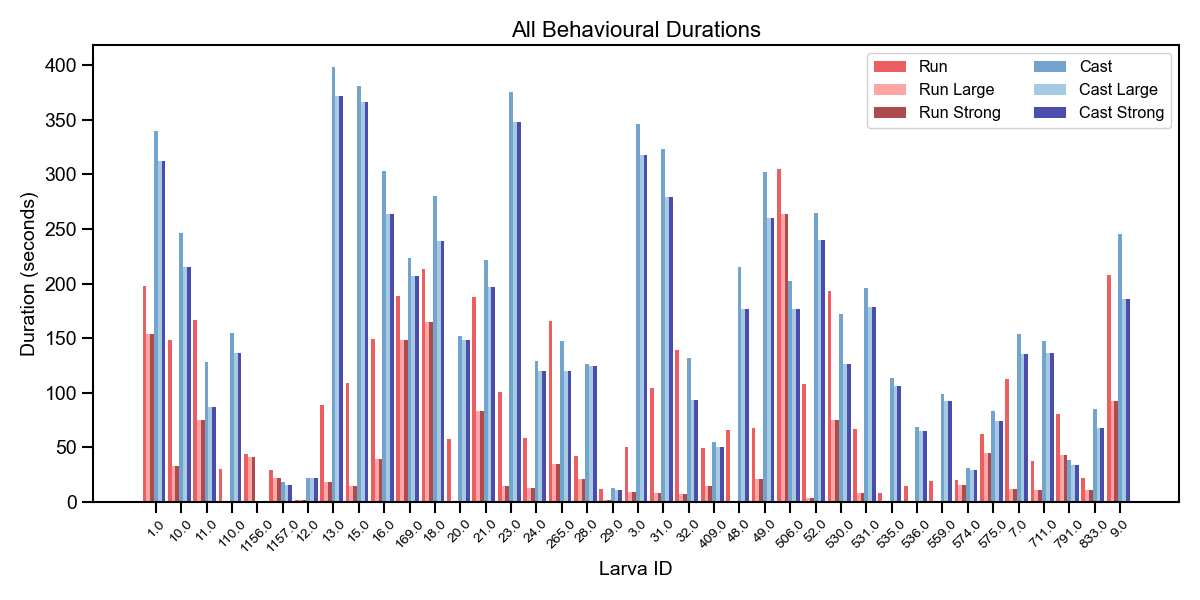

In [322]:
def plot_behavioural_metrics(trx_data):
    """Plot all behavioural metrics side by side in a single graph."""
    
    # Define behaviour groups and their colours
    behaviours = {
        'run': '#e41a1c',
        'run_large': '#ff7f7f',
        'run_strong': '#8b0000',
        'cast': '#377eb8',
        'cast_large': '#7fb5d6',
        'cast_strong': '#00008b'
    }
    
    larva_ids = sorted(trx_data["data"].keys())
    
    # Create figure
    plt.figure(figsize=(12, 6))
    
    # Calculate x positions with spacing
    x = np.arange(len(larva_ids)) * 2
    width = 0.3
    
    # Plot each behaviour type side by side
    for i, (behaviour, colour) in enumerate(behaviours.items()):
        durations = []
        for larva_id in larva_ids:
            frames = trx_data["data"][larva_id].get(f"{behaviour}_duration", 0)
            time_data = np.array(trx_data["data"][larva_id]['t'])
            frame_duration = np.mean(np.diff(time_data))
            durations.append(frames * frame_duration)
        
        # Plot bars with offset
        plt.bar(x + width * (i - len(behaviours)/2), durations,
                width, label=behaviour.replace('_', ' ').title(),
                color=colour, alpha=0.7)
    
    # Customise plot
    plt.title('All Behavioural Durations')
    plt.xlabel('Larva ID')
    plt.ylabel('Duration (seconds)')
    plt.xticks(x, larva_ids, rotation=45, fontsize=10)
    
    # Add compact legend in top left
    plt.legend(loc='upper right',
              ncol=2,  # Show legend in 2 columns
              fontsize='small',  # Reduce font size
              framealpha=0.9)    # Make background slightly transparent
    
    plt.tight_layout()
    plt.show()

# Generate graph
plot_behavioural_metrics(trx_data)

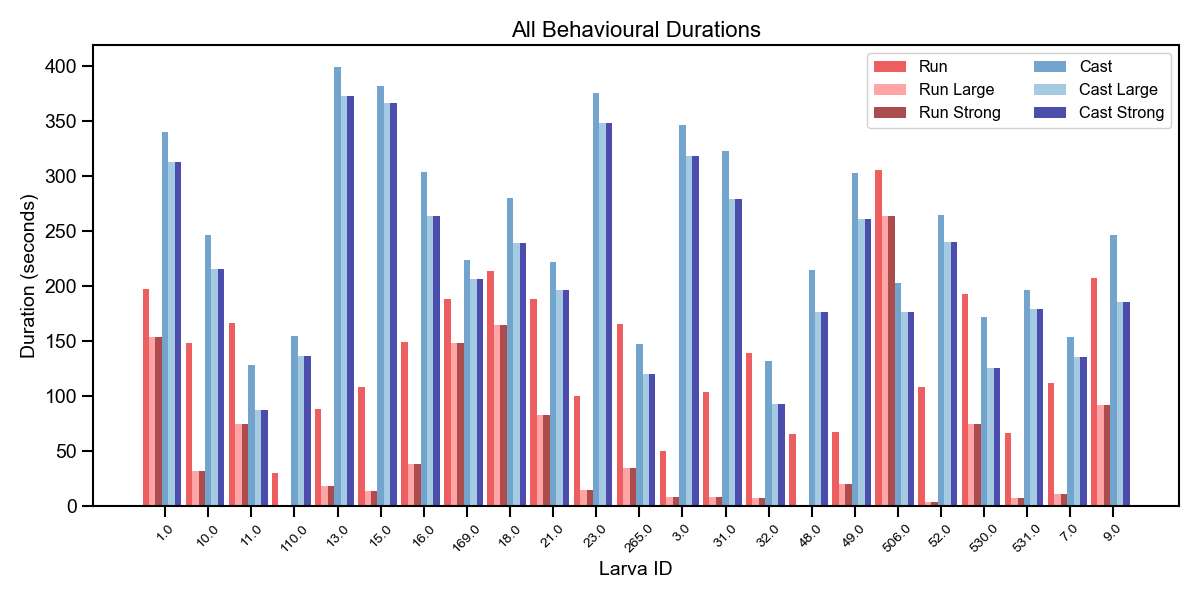

In [323]:
# Filter larvae based on duration threshold
threshold = 300  # Example: 300 seconds
filtered_trx_data = filter_larvae_by_duration(trx_data, threshold)

# Plot behavioral metrics for filtered larvae
plot_behavioural_metrics(filtered_trx_data)

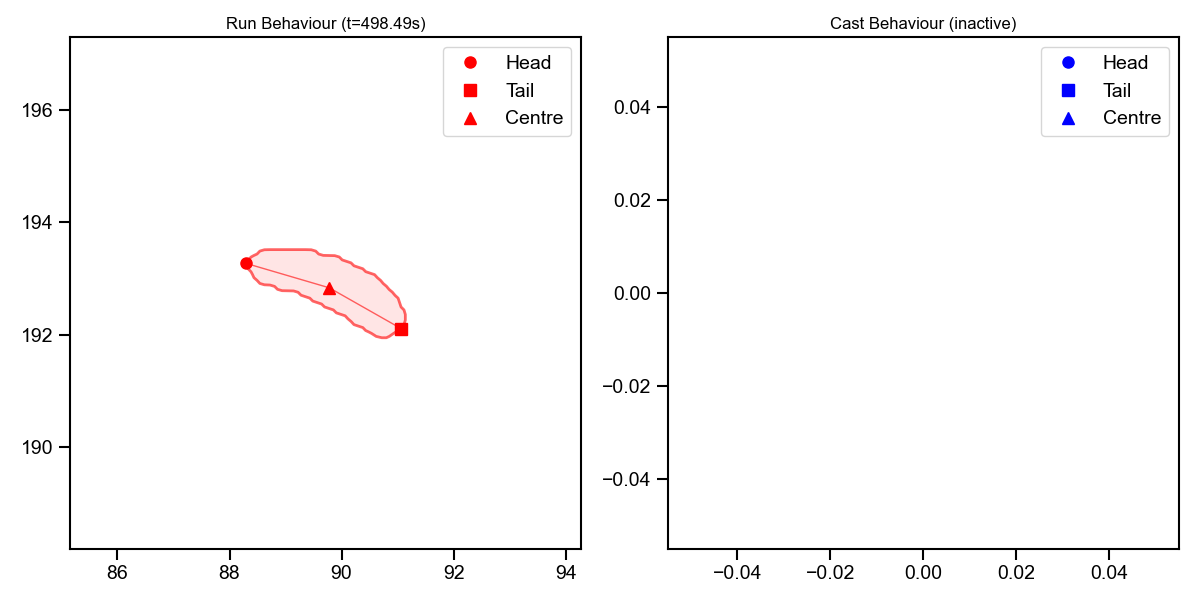

Saving video for larva 1005.0...
Video saved successfully!


In [272]:
def plot_spine_behaviors(trx_data, larva_id):
    """Plot head, tail, and center points during run and cast behaviours."""
    plt.ioff()
    
    # Get data for this larva
    larva = trx_data['data'][larva_id]
    x_spine = np.array(larva['x_spine'])
    y_spine = np.array(larva['y_spine'])
    x_centre = np.array(larva['x_center'])
    y_centre = np.array(larva['y_center'])
    x_contour = np.array(larva['x_contour'])
    y_contour = np.array(larva['y_contour'])
    time = np.array(larva['t'])
    
    # Get behavioural states (-1/1 encoded)
    run_frames = np.where((np.array(larva['run']) + 1) / 2)[0]
    cast_frames = np.where((np.array(larva['cast']) + 1) / 2)[0]
    
    # Create figure with two subplots
    fig = plt.figure(figsize=(12,6))
    gs = plt.GridSpec(1, 2)
    ax1 = plt.subplot(gs[0, 0])
    ax2 = plt.subplot(gs[0, 1])
    
    # Initialize empty plots for both behaviors
    # Run plots
    run_fill = ax1.fill([], [], 'r', alpha=0.1)[0]
    run_contour, = ax1.plot([], [], 'r-', lw=2, alpha=0.6)
    run_lines, = ax1.plot([], [], 'r-', lw=1, alpha=0.6)
    run_head, = ax1.plot([], [], 'ro', ms=8, label='Head')
    run_tail, = ax1.plot([], [], 'rs', ms=8, label='Tail')
    run_centre, = ax1.plot([], [], 'r^', ms=8, label='Centre')
    
    # Cast plots
    cast_fill = ax2.fill([], [], 'b', alpha=0.1)[0]
    cast_contour, = ax2.plot([], [], 'b-', lw=2, alpha=0.6)
    cast_lines, = ax2.plot([], [], 'b-', lw=1, alpha=0.6)
    cast_head, = ax2.plot([], [], 'bo', ms=8, label='Head')
    cast_tail, = ax2.plot([], [], 'bs', ms=8, label='Tail')
    cast_centre, = ax2.plot([], [], 'b^', ms=8, label='Centre')
    
    ax1.set_aspect('equal')
    ax2.set_aspect('equal')
    
    def update(frame):
        # Get spine points for current frame
        head_x, head_y = x_spine[0, frame], y_spine[0, frame]
        tail_x, tail_y = x_spine[-1, frame], y_spine[-1, frame]
        centre_x, centre_y = x_centre[frame], y_centre[frame]
        contour_x = x_contour[:, frame]
        contour_y = y_contour[:, frame]
        
        x_points = [head_x, centre_x, tail_x]
        y_points = [head_y, centre_y, tail_y]
        
        points = np.array([[head_x, head_y], [tail_x, tail_y], [centre_x, centre_y]])
        center = np.mean(points, axis=0)
        max_dist = np.max(np.linalg.norm(points - center, axis=1))
        window_size = max_dist * 3
        
        if frame in run_frames:
            run_fill.set_xy(np.column_stack([contour_x, contour_y]))
            run_contour.set_data(contour_x, contour_y)
            run_lines.set_data(x_points, y_points)
            run_head.set_data([head_x], [head_y])
            run_tail.set_data([tail_x], [tail_y])
            run_centre.set_data([centre_x], [centre_y])
            ax1.set_xlim(center[0] - window_size, center[0] + window_size)
            ax1.set_ylim(center[1] - window_size, center[1] + window_size)
            ax1.set_title(f'Run Behaviour (t={time[frame]:.2f}s)', fontsize=12)
        else:
            run_fill.set_xy(np.empty((0, 2)))
            run_contour.set_data([], [])
            run_lines.set_data([], [])
            run_head.set_data([], [])
            run_tail.set_data([], [])
            run_centre.set_data([], [])
            ax1.set_title('Run Behaviour (inactive)', fontsize=12)
        
        if frame in cast_frames:
            cast_fill.set_xy(np.column_stack([contour_x, contour_y]))
            cast_contour.set_data(contour_x, contour_y)
            cast_lines.set_data(x_points, y_points)
            cast_head.set_data([head_x], [head_y])
            cast_tail.set_data([tail_x], [tail_y])
            cast_centre.set_data([centre_x], [centre_y])
            ax2.set_xlim(center[0] - window_size, center[0] + window_size)
            ax2.set_ylim(center[1] - window_size, center[1] + window_size)
            ax2.set_title(f'Cast Behaviour (t={time[frame]:.2f}s)', fontsize=12)
        else:
            cast_fill.set_xy(np.empty((0, 2)))
            cast_contour.set_data([], [])
            cast_lines.set_data([], [])
            cast_head.set_data([], [])
            cast_tail.set_data([], [])
            cast_centre.set_data([], [])
            ax2.set_title('Cast Behaviour (inactive)', fontsize=12)
        
        return (run_fill, run_contour, run_lines, run_head, run_tail, run_centre,
                cast_fill, cast_contour, cast_lines, cast_head, cast_tail, cast_centre)
    
    # Create interactive controls
    play = widgets.Play(
        value=0,
        min=0,
        max=len(time) - 1,
        step=1,
        interval=50,
        description="Play"
    )
    
    slider = widgets.IntSlider(
        min=0,
        max=len(time) - 1,
        description='Frame:',
        value=0,
        style={'description_width': 'initial'},
        readout_format='d',
        layout=widgets.Layout(width='1000px')
    )
    
    # Link play and slider
    widgets.jslink((play, 'value'), (slider, 'value'))
    
    def update_plot(change):
        if change['type'] == 'change' and change['name'] == 'value':
            update(change['new'])
            fig.canvas.draw_idle()
    
    # Add legends
    ax1.legend()
    ax2.legend()
    
    # Connect events
    slider.observe(update_plot)
    
    # Display controls and figure
    display(widgets.HBox([play, slider]))
    
    # Initialize plot
    update_plot({'type': 'change', 'name': 'value', 'new': 0})
    
    plt.tight_layout()
    display(fig.canvas)

def save_spine_behaviors_video(trx_data, larva_id, output_path='../results/spine_behaviors.mp4', fps=20):
    """Save spine behaviors animation as video."""
    plt.ioff()
    
    # Get data for this larva
    larva = trx_data['data'][larva_id]
    x_spine = np.array(larva['x_spine'])
    y_spine = np.array(larva['y_spine'])
    x_centre = np.array(larva['x_center'])
    y_centre = np.array(larva['y_center'])
    x_contour = np.array(larva['x_contour'])
    y_contour = np.array(larva['y_contour'])
    time = np.array(larva['t'])
    
    # Get behavioural states
    run_frames = np.where((np.array(larva['run']) + 1) / 2)[0]
    cast_frames = np.where((np.array(larva['cast']) + 1) / 2)[0]
    
    # Create figure
    fig = plt.figure(figsize=(12,6))
    gs = plt.GridSpec(1, 2)
    ax1 = plt.subplot(gs[0, 0])
    ax2 = plt.subplot(gs[0, 1])
    
    # Initialize plots
    # Run plots
    run_fill = ax1.fill([], [], 'r', alpha=0.1)[0]
    run_contour, = ax1.plot([], [], 'r-', lw=2, alpha=0.6)
    run_lines, = ax1.plot([], [], 'r-', lw=1, alpha=0.6)
    run_head, = ax1.plot([], [], 'ro', ms=8, label='Head')
    run_tail, = ax1.plot([], [], 'rs', ms=8, label='Tail')
    run_centre, = ax1.plot([], [], 'r^', ms=8, label='Centre')
    
    # Cast plots
    cast_fill = ax2.fill([], [], 'b', alpha=0.1)[0]
    cast_contour, = ax2.plot([], [], 'b-', lw=2, alpha=0.6)
    cast_lines, = ax2.plot([], [], 'b-', lw=1, alpha=0.6)
    cast_head, = ax2.plot([], [], 'bo', ms=8, label='Head')
    cast_tail, = ax2.plot([], [], 'bs', ms=8, label='Tail')
    cast_centre, = ax2.plot([], [], 'b^', ms=8, label='Centre')
    
    ax1.set_aspect('equal')
    ax2.set_aspect('equal')
    
    def update(frame):
        head_x, head_y = x_spine[0, frame], y_spine[0, frame]
        tail_x, tail_y = x_spine[-1, frame], y_spine[-1, frame]
        centre_x, centre_y = x_centre[frame], y_centre[frame]
        contour_x = x_contour[:, frame]
        contour_y = y_contour[:, frame]
        
        x_points = [head_x, centre_x, tail_x]
        y_points = [head_y, centre_y, tail_y]
        
        points = np.array([[head_x, head_y], [tail_x, tail_y], [centre_x, centre_y]])
        center = np.mean(points, axis=0)
        max_dist = np.max(np.linalg.norm(points - center, axis=1))
        window_size = max_dist * 3
        
        if frame in run_frames:
            run_fill.set_xy(np.column_stack([contour_x, contour_y]))
            run_contour.set_data(contour_x, contour_y)
            run_lines.set_data(x_points, y_points)
            run_head.set_data([head_x], [head_y])
            run_tail.set_data([tail_x], [tail_y])
            run_centre.set_data([centre_x], [centre_y])
            ax1.set_xlim(center[0] - window_size, center[0] + window_size)
            ax1.set_ylim(center[1] - window_size, center[1] + window_size)
            ax1.set_title(f'Run Behaviour (t={time[frame]:.2f}s)', fontsize=12)
        else:
            run_fill.set_xy(np.empty((0, 2)))
            run_contour.set_data([], [])
            run_lines.set_data([], [])
            run_head.set_data([], [])
            run_tail.set_data([], [])
            run_centre.set_data([], [])
            ax1.set_title('Run Behaviour (inactive)', fontsize=12)
        
        if frame in cast_frames:
            cast_fill.set_xy(np.column_stack([contour_x, contour_y]))
            cast_contour.set_data(contour_x, contour_y)
            cast_lines.set_data(x_points, y_points)
            cast_head.set_data([head_x], [head_y])
            cast_tail.set_data([tail_x], [tail_y])
            cast_centre.set_data([centre_x], [centre_y])
            ax2.set_xlim(center[0] - window_size, center[0] + window_size)
            ax2.set_ylim(center[1] - window_size, center[1] + window_size)
            ax2.set_title(f'Cast Behaviour (t={time[frame]:.2f}s)', fontsize=12)
        else:
            cast_fill.set_xy(np.empty((0, 2)))
            cast_contour.set_data([], [])
            cast_lines.set_data([], [])
            cast_head.set_data([], [])
            cast_tail.set_data([], [])
            cast_centre.set_data([], [])
            ax2.set_title('Cast Behaviour (inactive)', fontsize=12)
        
        return (run_fill, run_contour, run_lines, run_head, run_tail, run_centre,
                cast_fill, cast_contour, cast_lines, cast_head, cast_tail, cast_centre)
    
    # Add legends
    ax1.legend()
    ax2.legend()
    
    # Create animation
    anim = animation.FuncAnimation(
        fig, update,
        frames=range(len(time)),
        interval=1000/fps,
        blit=True
    )
    
    # Set up writer and save
    writer = animation.FFMpegWriter(fps=fps, metadata=dict(artist='Me'), bitrate=1800)
    os.makedirs(os.path.dirname(output_path), exist_ok=True)
    
    print(f"Saving video for larva {larva_id}...")
    anim.save(output_path, writer=writer)
    print("Video saved successfully!")
    plt.close()


# Example usage:
first_larva = sorted(trx_data['data'].keys())[2]
plot_spine_behaviors(trx_data, first_larva)

# Save the video
save_spine_behaviors_video(trx_data, first_larva, '../results/spine_behaviors.mp4', fps=20)


## Important for direction calculation
As Tihana said, sometimes head and tail are exchanged, so in that case, direction calculation may be misinterpreted. CHECK FOR THIS

In [324]:
def classify_cast_direction(x_spine, y_spine, x_centre, y_centre, cast_frames):
    """
    Classify cast directions as left or right based on head position relative to tail-centre vector.
    Returns dictionary with cast direction counts and percentages.
    """
    directions = []
    
    for frame in cast_frames:
        # Get coordinates
        tail_x, tail_y = x_spine[-1, frame], y_spine[-1, frame]
        head_x, head_y = x_spine[0, frame], y_spine[0, frame]
        centre_x, centre_y = x_centre[frame], y_centre[frame]
        
        # Create vectors
        tail_to_centre = np.array([centre_x - tail_x, centre_y - tail_y])
        tail_to_head = np.array([head_x - tail_x, head_y - tail_y])
        
        # Calculate cross product
        cross_product = np.cross(tail_to_centre, tail_to_head)
        
        # Classify direction (positive cross product = left cast)
        directions.append('left' if cross_product > 0 else 'right')
    
    # Calculate statistics
    total_casts = len(directions)
    left_casts = directions.count('left')
    right_casts = directions.count('right')
    
    stats = {
        'total_casts': total_casts,
        'left_casts': left_casts,
        'right_casts': right_casts,
        'left_percentage': (left_casts / total_casts * 100) if total_casts > 0 else 0,
        'right_percentage': (right_casts / total_casts * 100) if total_casts > 0 else 0
    }
    
    return stats

def analyze_all_larvae_cast_directions(trx_data):
    """Analyze cast directions for all larvae."""
    results = {}
    
    for larva_id in sorted(trx_data['data'].keys()):
        larva = trx_data['data'][larva_id]
        
        # Get necessary data
        x_spine = np.array(larva['x_spine'])
        y_spine = np.array(larva['y_spine'])
        x_centre = np.array(larva['x_center'])
        y_centre = np.array(larva['y_center'])
        cast_frames = np.where((np.array(larva['cast']) + 1) / 2)[0]
        
        # Calculate statistics
        stats = classify_cast_direction(x_spine, y_spine, x_centre, y_centre, cast_frames)
        results[larva_id] = stats
    
    # Print summary
    print("\nCast Direction Analysis for All Larvae:")
    print("-" * 50)
    for larva_id, stats in results.items():
        print(f"\nLarva {larva_id}:")
        print(f"Total casts: {stats['total_casts']}")
        print(f"Left casts: {stats['left_casts']} ({stats['left_percentage']:.1f}%)")
        print(f"Right casts: {stats['right_casts']} ({stats['right_percentage']:.1f}%)")
    
    return results

# Run analysis
cast_direction_results = analyze_all_larvae_cast_directions(trx_data)

/var/folders/qs/_71td1zx7kjd4t5xhw9wndn00000gp/T/ipykernel_27762/3177737271.py:19: DeprecationWarning: Arrays of 2-dimensional vectors are deprecated. Use arrays of 3-dimensional vectors instead. (deprecated in NumPy 2.0)
  cross_product = np.cross(tail_to_centre, tail_to_head)



Cast Direction Analysis for All Larvae:
--------------------------------------------------

Larva 1.0:
Total casts: 6072
Left casts: 4388 (72.3%)
Right casts: 1684 (27.7%)

Larva 10.0:
Total casts: 4400
Left casts: 2421 (55.0%)
Right casts: 1979 (45.0%)

Larva 11.0:
Total casts: 2289
Left casts: 1384 (60.5%)
Right casts: 905 (39.5%)

Larva 110.0:
Total casts: 2769
Left casts: 1081 (39.0%)
Right casts: 1688 (61.0%)

Larva 1156.0:
Total casts: 0
Left casts: 0 (0.0%)
Right casts: 0 (0.0%)

Larva 1157.0:
Total casts: 320
Left casts: 102 (31.9%)
Right casts: 218 (68.1%)

Larva 12.0:
Total casts: 378
Left casts: 166 (43.9%)
Right casts: 212 (56.1%)

Larva 13.0:
Total casts: 7115
Left casts: 3670 (51.6%)
Right casts: 3445 (48.4%)

Larva 15.0:
Total casts: 6809
Left casts: 2835 (41.6%)
Right casts: 3974 (58.4%)

Larva 16.0:
Total casts: 5418
Left casts: 2477 (45.7%)
Right casts: 2941 (54.3%)

Larva 169.0:
Total casts: 3992
Left casts: 1557 (39.0%)
Right casts: 2435 (61.0%)

Larva 18.0:
Total 

/var/folders/qs/_71td1zx7kjd4t5xhw9wndn00000gp/T/ipykernel_27762/3177737271.py:19: DeprecationWarning: Arrays of 2-dimensional vectors are deprecated. Use arrays of 3-dimensional vectors instead. (deprecated in NumPy 2.0)
  cross_product = np.cross(tail_to_centre, tail_to_head)



Cast Direction Analysis for All Larvae:
--------------------------------------------------

Larva 1.0:
Total casts: 6072
Left casts: 4388 (72.3%)
Right casts: 1684 (27.7%)

Larva 10.0:
Total casts: 4400
Left casts: 2421 (55.0%)
Right casts: 1979 (45.0%)

Larva 11.0:
Total casts: 2289
Left casts: 1384 (60.5%)
Right casts: 905 (39.5%)

Larva 110.0:
Total casts: 2769
Left casts: 1081 (39.0%)
Right casts: 1688 (61.0%)

Larva 1156.0:
Total casts: 0
Left casts: 0 (0.0%)
Right casts: 0 (0.0%)

Larva 1157.0:
Total casts: 320
Left casts: 102 (31.9%)
Right casts: 218 (68.1%)

Larva 12.0:
Total casts: 378
Left casts: 166 (43.9%)
Right casts: 212 (56.1%)

Larva 13.0:
Total casts: 7115
Left casts: 3670 (51.6%)
Right casts: 3445 (48.4%)

Larva 15.0:
Total casts: 6809
Left casts: 2835 (41.6%)
Right casts: 3974 (58.4%)

Larva 16.0:
Total casts: 5418
Left casts: 2477 (45.7%)
Right casts: 2941 (54.3%)

Larva 169.0:
Total casts: 3992
Left casts: 1557 (39.0%)
Right casts: 2435 (61.0%)

Larva 18.0:
Total 

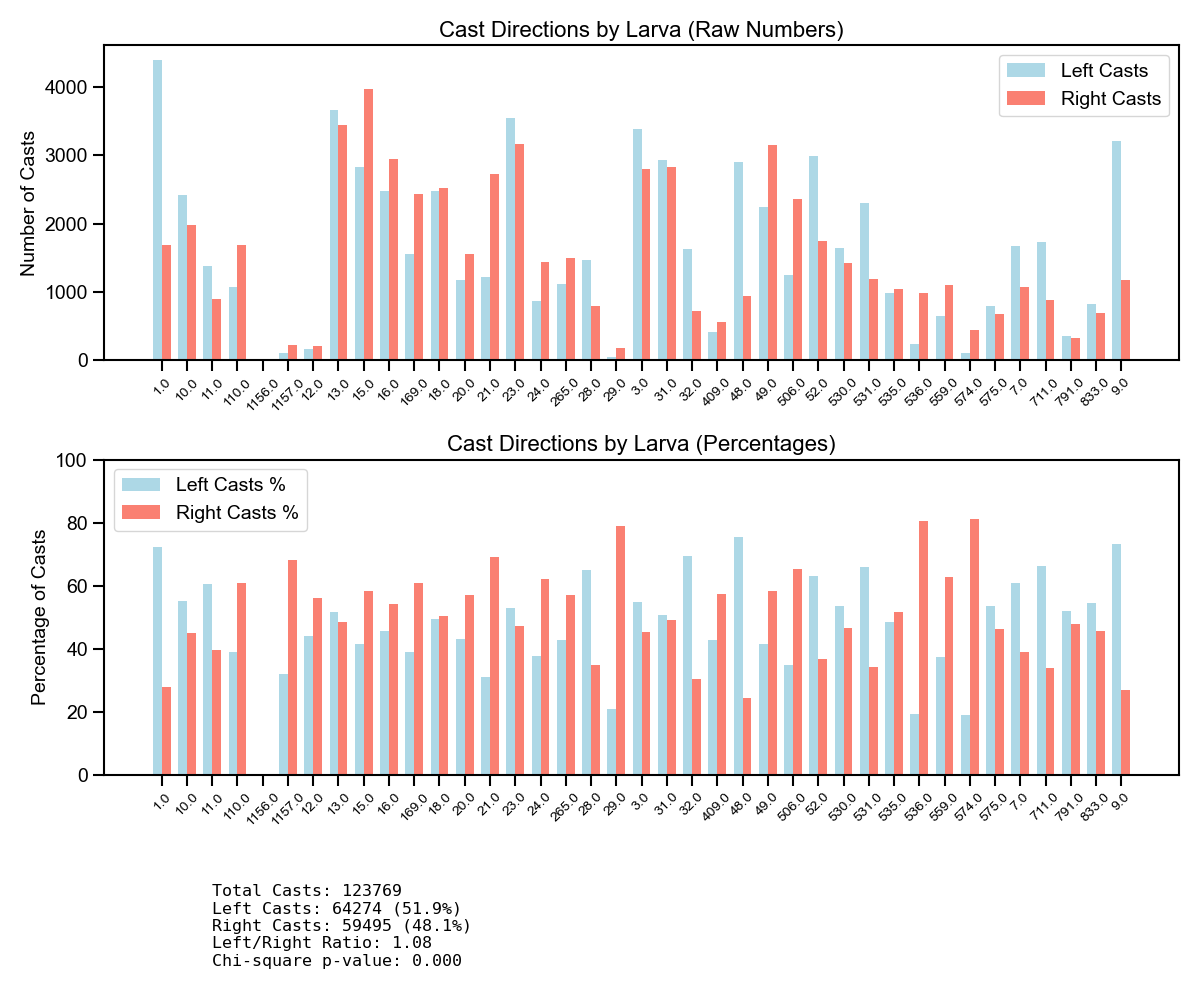

In [325]:
def plot_cast_statistics(results):
    """Plot cast direction statistics for all larvae with percentages."""
    
    # Get data for plotting
    larva_ids = list(results.keys())
    left_casts = [results[lid]['left_casts'] for lid in larva_ids]
    right_casts = [results[lid]['right_casts'] for lid in larva_ids]
    total_per_larva = [l + r for l, r in zip(left_casts, right_casts)]
    
    # Calculate percentages
    left_percentages = [l/t*100 if t > 0 else 0 for l, t in zip(left_casts, total_per_larva)]
    right_percentages = [r/t*100 if t > 0 else 0 for r, t in zip(right_casts, total_per_larva)]
    
    # Create figure with three subplots
    fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12, 10), 
                                       height_ratios=[3, 3, 1])
    
    # Plot 1: Raw numbers
    x = np.arange(len(larva_ids))
    width = 0.35
    
    ax1.bar(x - width/2, left_casts, width, label='Left Casts', 
            color='lightblue')
    ax1.bar(x + width/2, right_casts, width, label='Right Casts', 
            color='salmon')
    
    ax1.set_ylabel('Number of Casts')
    ax1.set_title('Cast Directions by Larva (Raw Numbers)')
    ax1.set_xticks(x)
    ax1.set_xticklabels(larva_ids, rotation=45, fontsize=10)
    ax1.legend()
    
    # Plot 2: Percentages
    ax2.bar(x - width/2, left_percentages, width, 
            label='Left Casts %', color='lightblue')
    ax2.bar(x + width/2, right_percentages, width, 
            label='Right Casts %', color='salmon')
    
    ax2.set_ylabel('Percentage of Casts')
    ax2.set_title('Cast Directions by Larva (Percentages)')
    ax2.set_xticks(x)
    ax2.set_xticklabels(larva_ids, rotation=45, fontsize=10)
    ax2.legend()
    ax2.set_ylim(0, 100)
    
    # Statistics table
    total_left = sum(left_casts)
    total_right = sum(right_casts)
    total_casts = total_left + total_right
    
    stats_text = [
        f"Total Casts: {total_casts}",
        f"Left Casts: {total_left} ({total_left/total_casts*100:.1f}%)",
        f"Right Casts: {total_right} ({total_right/total_casts*100:.1f}%)",
        f"Left/Right Ratio: {total_left/total_right:.2f}",
        f"Chi-square p-value: {stats.chisquare([total_left, total_right])[1]:.3f}"
    ]
    
    ax3.axis('off')
    ax3.text(0.1, 0.5, '\n'.join(stats_text), 
             fontsize=12, fontfamily='monospace',
             verticalalignment='center')
    
    plt.tight_layout()
    plt.show()

# Required imports
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Run analysis and plot results
cast_direction_results = analyze_all_larvae_cast_directions(trx_data)
plot_cast_statistics(cast_direction_results)

/var/folders/qs/_71td1zx7kjd4t5xhw9wndn00000gp/T/ipykernel_27762/3177737271.py:19: DeprecationWarning: Arrays of 2-dimensional vectors are deprecated. Use arrays of 3-dimensional vectors instead. (deprecated in NumPy 2.0)
  cross_product = np.cross(tail_to_centre, tail_to_head)



Cast Direction Analysis for All Larvae:
--------------------------------------------------

Larva 1.0:
Total casts: 6072
Left casts: 4388 (72.3%)
Right casts: 1684 (27.7%)

Larva 10.0:
Total casts: 4400
Left casts: 2421 (55.0%)
Right casts: 1979 (45.0%)

Larva 11.0:
Total casts: 2289
Left casts: 1384 (60.5%)
Right casts: 905 (39.5%)

Larva 110.0:
Total casts: 2769
Left casts: 1081 (39.0%)
Right casts: 1688 (61.0%)

Larva 13.0:
Total casts: 7115
Left casts: 3670 (51.6%)
Right casts: 3445 (48.4%)

Larva 15.0:
Total casts: 6809
Left casts: 2835 (41.6%)
Right casts: 3974 (58.4%)

Larva 16.0:
Total casts: 5418
Left casts: 2477 (45.7%)
Right casts: 2941 (54.3%)

Larva 169.0:
Total casts: 3992
Left casts: 1557 (39.0%)
Right casts: 2435 (61.0%)

Larva 18.0:
Total casts: 4996
Left casts: 2476 (49.6%)
Right casts: 2520 (50.4%)

Larva 21.0:
Total casts: 3956
Left casts: 1225 (31.0%)
Right casts: 2731 (69.0%)

Larva 23.0:
Total casts: 6704
Left casts: 3540 (52.8%)
Right casts: 3164 (47.2%)

Larva

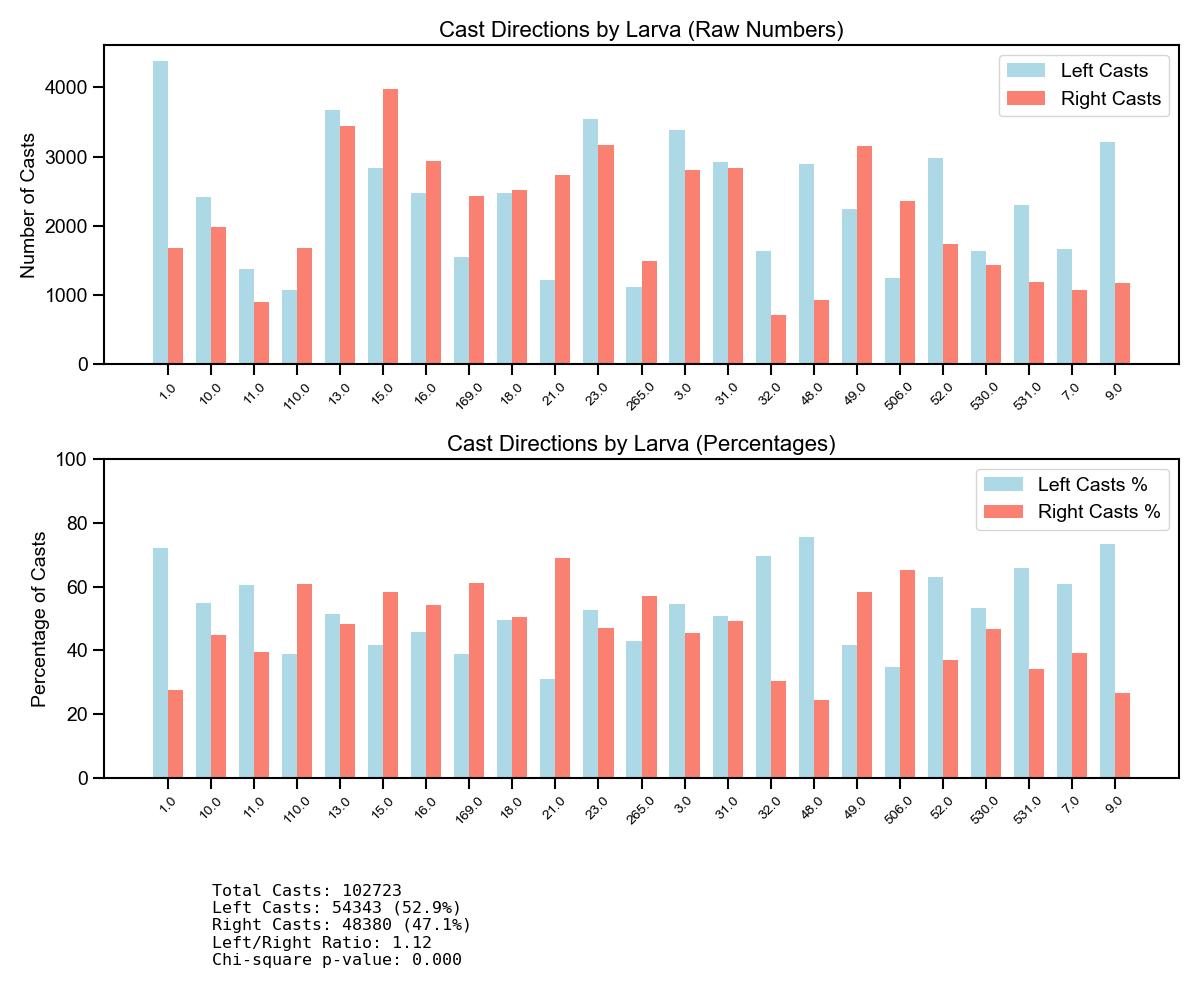

In [326]:
# Filter larvae based on duration threshold
filtered_trx_data = filter_larvae_by_duration(trx_data, threshold)

# Run analysis and plot results for filtered larvae
cast_direction_results = analyze_all_larvae_cast_directions(filtered_trx_data)
plot_cast_statistics(cast_direction_results)

## NOW, look at upstream v/s downstream head casts
Instead of left and right head casts, which ... interestingly seem unbiased, define upstream and downstream, by getting the cross product with the unit vector in the wind direction (x-axis).

In [327]:
def analyze_all_larvae_cast_directions(trx_data):
    """Analyze cast directions for all larvae."""
    results = {}
    
    for larva_id in sorted(trx_data['data'].keys()):
        larva = trx_data['data'][larva_id]
        
        # Get necessary data
        x_spine = np.array(larva['x_spine'])
        y_spine = np.array(larva['y_spine'])
        x_centre = np.array(larva['x_center'])
        y_centre = np.array(larva['y_center'])
        cast_frames = np.where((np.array(larva['cast']) + 1) / 2)[0]
        
        # Calculate statistics
        stats = classify_cast_direction(x_spine, y_spine, x_centre, y_centre, cast_frames)
        results[larva_id] = stats
    
        # Print summary with updated keys
        print(f"\nLarva {larva_id}:")
        print(f"Total casts: {stats['total_casts']}")
        print(f"Upstream casts: {stats['upstream_casts']} ({stats['upstream_percentage']:.1f}%)")
        print(f"Downstream casts: {stats['downstream_casts']} ({stats['downstream_percentage']:.1f}%)")
    
    return results

In [303]:
path

'/Users/sharbat/Projects/anemotaxis/data/20240308_131239/trx.mat'

/var/folders/qs/_71td1zx7kjd4t5xhw9wndn00000gp/T/ipykernel_27762/3505363070.py:20: DeprecationWarning: Arrays of 2-dimensional vectors are deprecated. Use arrays of 3-dimensional vectors instead. (deprecated in NumPy 2.0)
  cross_product = np.cross(x_axis, centre_to_head)



Larva 1.0:
Total casts: 6072
Upstream casts: 4531 (74.6%)
Downstream casts: 1541 (25.4%)

Larva 10.0:
Total casts: 4400
Upstream casts: 2019 (45.9%)
Downstream casts: 2381 (54.1%)

Larva 11.0:
Total casts: 2289
Upstream casts: 471 (20.6%)
Downstream casts: 1818 (79.4%)

Larva 110.0:
Total casts: 2769
Upstream casts: 1096 (39.6%)
Downstream casts: 1673 (60.4%)

Larva 1156.0:
Total casts: 0
Upstream casts: 0 (0.0%)
Downstream casts: 0 (0.0%)

Larva 1157.0:
Total casts: 320
Upstream casts: 161 (50.3%)
Downstream casts: 159 (49.7%)

Larva 12.0:
Total casts: 378
Upstream casts: 268 (70.9%)
Downstream casts: 110 (29.1%)

Larva 13.0:
Total casts: 7115
Upstream casts: 5654 (79.5%)
Downstream casts: 1461 (20.5%)

Larva 15.0:
Total casts: 6809
Upstream casts: 2563 (37.6%)
Downstream casts: 4246 (62.4%)

Larva 16.0:
Total casts: 5418
Upstream casts: 3830 (70.7%)
Downstream casts: 1588 (29.3%)

Larva 169.0:
Total casts: 3992
Upstream casts: 2324 (58.2%)
Downstream casts: 1668 (41.8%)

Larva 18.0:

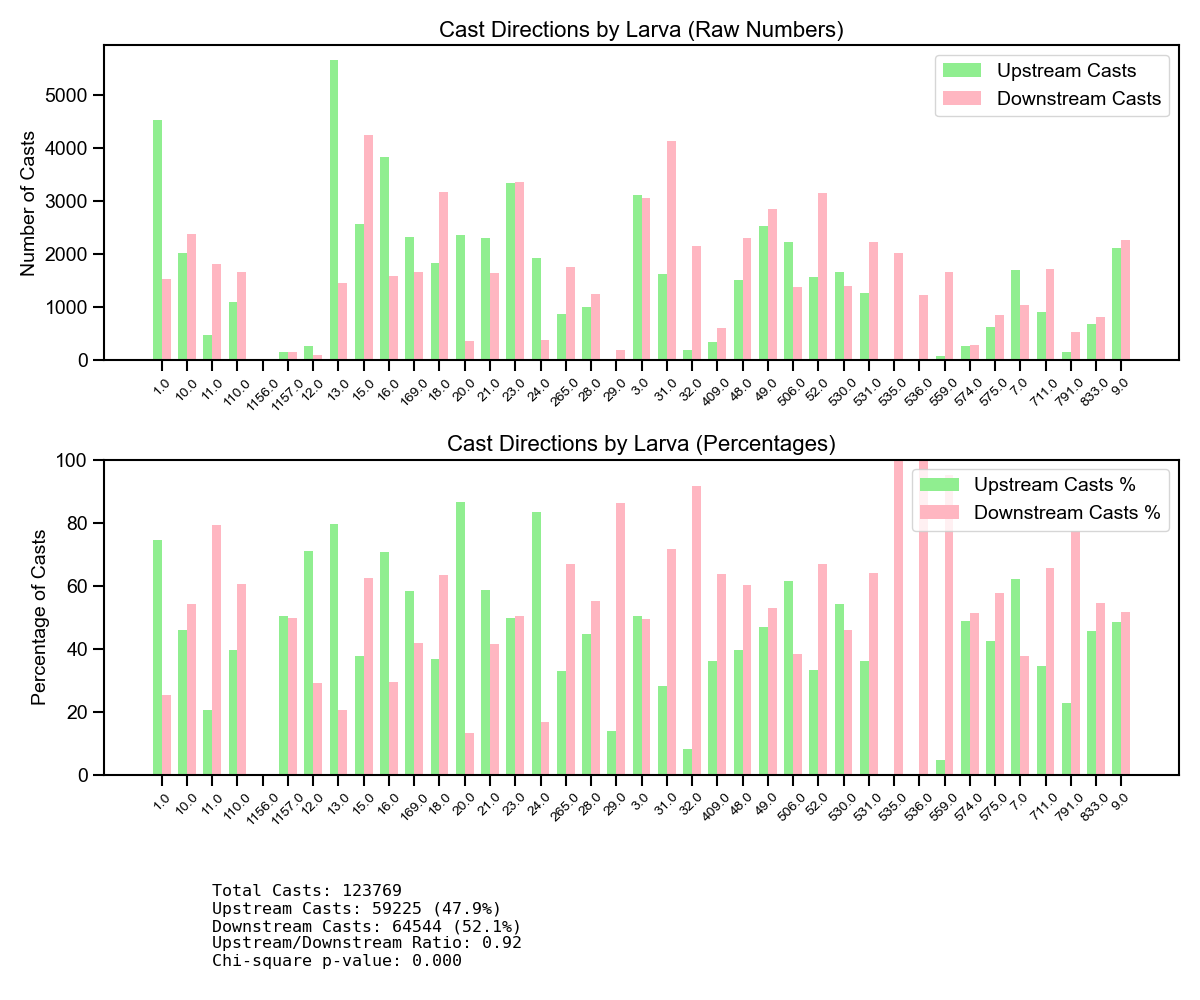

In [328]:
def classify_cast_direction(x_spine, y_spine, x_centre, y_centre, cast_frames):
    """
    Classify cast directions as downstream/upstream based on head position 
    relative to tail-centre vector and x-axis reference.
    """
    directions = []
    x_axis = np.array([-1, 0])  # Reference vector pointing right (negative x-direction = downstream)
    
    for frame in cast_frames:
        # Get coordinates
        tail_x, tail_y = x_spine[-1, frame], y_spine[-1, frame]
        head_x, head_y = x_spine[0, frame], y_spine[0, frame]
        centre_x, centre_y = x_centre[frame], y_centre[frame]
        
        # Create vectors
        tail_to_centre = np.array([centre_x - tail_x, centre_y - tail_y])
        centre_to_head = np.array([head_x - centre_x, head_y - centre_y])
        
        # Calculate cross product with x-axis
        cross_product = np.cross(x_axis, centre_to_head)
        
        # Reverse the classification: positive cross product = upstream
        directions.append('upstream' if cross_product > 0 else 'downstream')
    
    # Calculate statistics
    total_casts = len(directions)
    upstream_casts = directions.count('upstream')
    downstream_casts = directions.count('downstream')
    
    stats = {
        'total_casts': total_casts,
        'upstream_casts': upstream_casts,
        'downstream_casts': downstream_casts,
        'upstream_percentage': (upstream_casts / total_casts * 100) if total_casts > 0 else 0,
        'downstream_percentage': (downstream_casts / total_casts * 100) if total_casts > 0 else 0
    }
    
    return stats

def plot_cast_statistics(results):
    """Plot cast direction statistics for all larvae with percentages."""
    
    # Get data for plotting
    larva_ids = list(results.keys())
    upstream_casts = [results[lid]['upstream_casts'] for lid in larva_ids]
    downstream_casts = [results[lid]['downstream_casts'] for lid in larva_ids]
    total_per_larva = [u + d for u, d in zip(upstream_casts, downstream_casts)]
    
    # Calculate percentages
    upstream_percentages = [u/t*100 if t > 0 else 0 for u, t in zip(upstream_casts, total_per_larva)]
    downstream_percentages = [d/t*100 if t > 0 else 0 for d, t in zip(downstream_casts, total_per_larva)]
    
    # Create figure with three subplots
    fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12, 10), 
                                       height_ratios=[3, 3, 1])
    
    # Plot 1: Raw numbers
    x = np.arange(len(larva_ids))
    width = 0.35
    
    ax1.bar(x - width/2, upstream_casts, width, label='Upstream Casts', 
            color='lightgreen')
    ax1.bar(x + width/2, downstream_casts, width, label='Downstream Casts', 
            color='lightpink')
    
    ax1.set_ylabel('Number of Casts')
    ax1.set_title('Cast Directions by Larva (Raw Numbers)')
    ax1.set_xticks(x)
    ax1.set_xticklabels(larva_ids, rotation=45, fontsize=10)
    ax1.legend()
    
    # Plot 2: Percentages
    ax2.bar(x - width/2, upstream_percentages, width, 
            label='Upstream Casts %', color='lightgreen')
    ax2.bar(x + width/2, downstream_percentages, width, 
            label='Downstream Casts %', color='lightpink')
    
    ax2.set_ylabel('Percentage of Casts')
    ax2.set_title('Cast Directions by Larva (Percentages)')
    ax2.set_xticks(x)
    ax2.set_xticklabels(larva_ids, rotation=45,fontsize=10)
    ax2.legend()
    ax2.set_ylim(0, 100)
    
    # Statistics table
    total_upstream = sum(upstream_casts)
    total_downstream = sum(downstream_casts)
    total_casts = total_upstream + total_downstream
    
    stats_text = [
        f"Total Casts: {total_casts}",
        f"Upstream Casts: {total_upstream} ({total_upstream/total_casts*100:.1f}%)",
        f"Downstream Casts: {total_downstream} ({total_downstream/total_casts*100:.1f}%)",
        f"Upstream/Downstream Ratio: {total_upstream/total_downstream:.2f}",
        f"Chi-square p-value: {stats.chisquare([total_upstream, total_downstream])[1]:.3f}"
    ]
    
    ax3.axis('off')
    ax3.text(0.1, 0.5, '\n'.join(stats_text), 
             fontsize=12, fontfamily='monospace',
             verticalalignment='center')
    
    plt.tight_layout()
    plt.show()

# Required imports
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Run analysis and plot results
cast_direction_results = analyze_all_larvae_cast_directions(trx_data)
plot_cast_statistics(cast_direction_results)

/var/folders/qs/_71td1zx7kjd4t5xhw9wndn00000gp/T/ipykernel_27762/3505363070.py:20: DeprecationWarning: Arrays of 2-dimensional vectors are deprecated. Use arrays of 3-dimensional vectors instead. (deprecated in NumPy 2.0)
  cross_product = np.cross(x_axis, centre_to_head)



Larva 1.0:
Total casts: 6072
Upstream casts: 4531 (74.6%)
Downstream casts: 1541 (25.4%)

Larva 10.0:
Total casts: 4400
Upstream casts: 2019 (45.9%)
Downstream casts: 2381 (54.1%)

Larva 11.0:
Total casts: 2289
Upstream casts: 471 (20.6%)
Downstream casts: 1818 (79.4%)

Larva 110.0:
Total casts: 2769
Upstream casts: 1096 (39.6%)
Downstream casts: 1673 (60.4%)

Larva 13.0:
Total casts: 7115
Upstream casts: 5654 (79.5%)
Downstream casts: 1461 (20.5%)

Larva 15.0:
Total casts: 6809
Upstream casts: 2563 (37.6%)
Downstream casts: 4246 (62.4%)

Larva 16.0:
Total casts: 5418
Upstream casts: 3830 (70.7%)
Downstream casts: 1588 (29.3%)

Larva 169.0:
Total casts: 3992
Upstream casts: 2324 (58.2%)
Downstream casts: 1668 (41.8%)

Larva 18.0:
Total casts: 4996
Upstream casts: 1829 (36.6%)
Downstream casts: 3167 (63.4%)

Larva 21.0:
Total casts: 3956
Upstream casts: 2314 (58.5%)
Downstream casts: 1642 (41.5%)

Larva 23.0:
Total casts: 6704
Upstream casts: 3337 (49.8%)
Downstream casts: 3367 (50.2%)

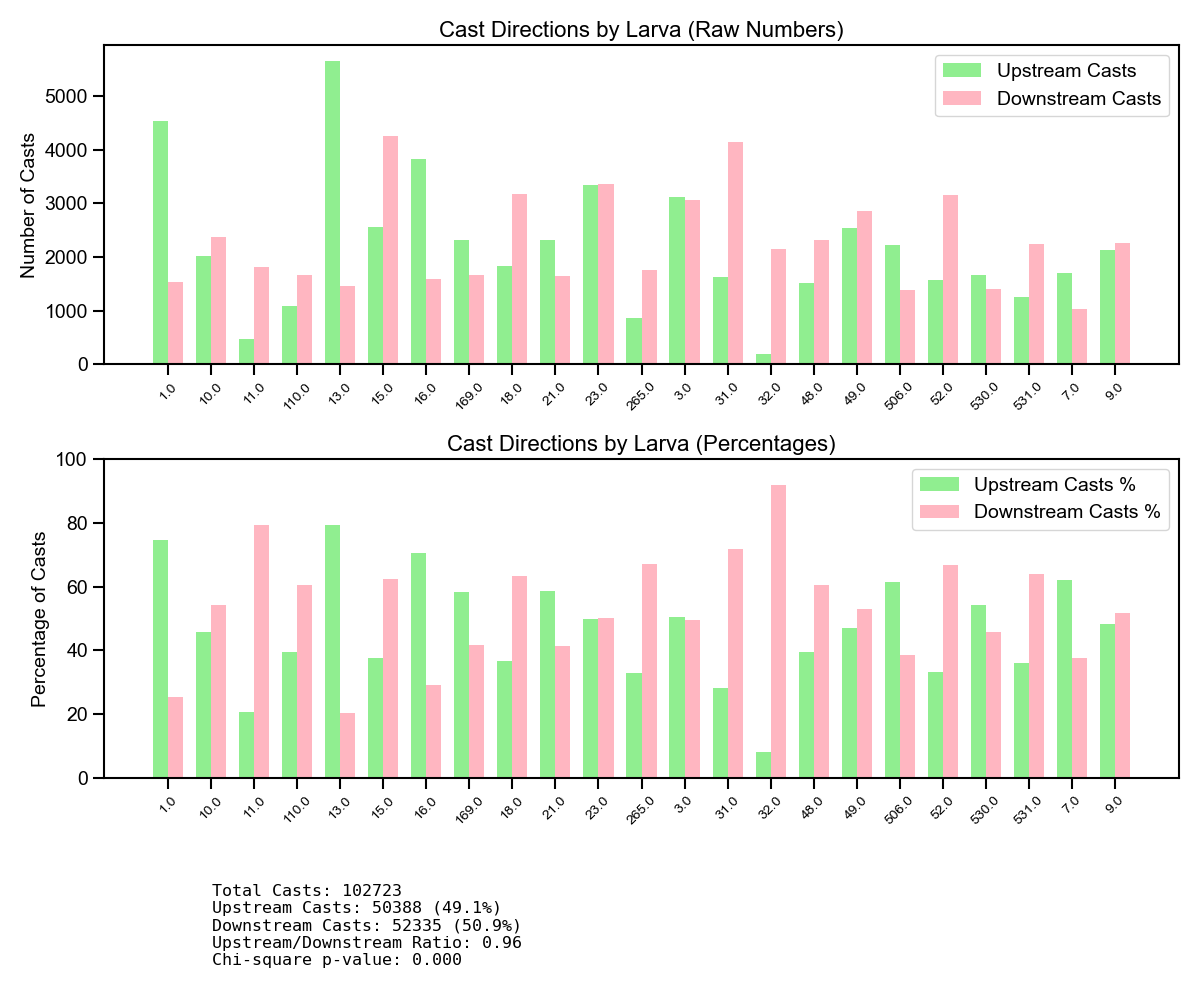

In [329]:
# Run analysis and plot results for filtered larvae
cast_direction_results = analyze_all_larvae_cast_directions(filtered_trx_data)
plot_cast_statistics(cast_direction_results)

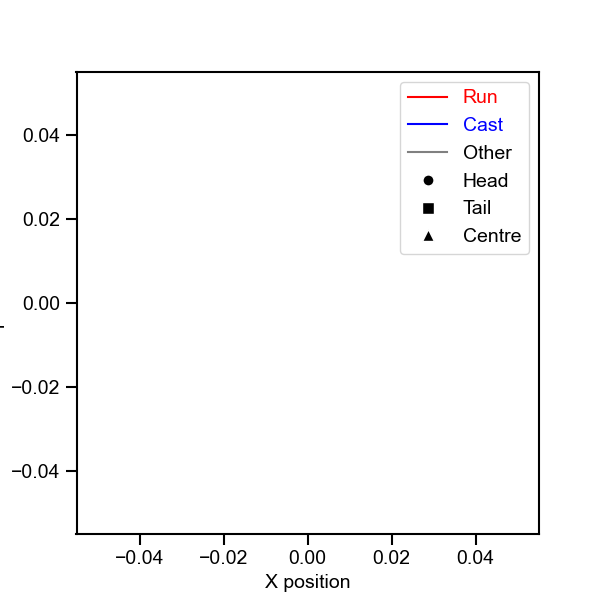

In [232]:
# Required imports
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
import ipywidgets as widgets
from IPython.display import display
from matplotlib.lines import Line2D

def plot_behavioral_contour(trx_data, larva_id='1.0'):
    """Plot filled larva contour with colors indicating behavioral state and spine points."""
    plt.ioff()
    
    # Get data
    larva = trx_data['data'][larva_id]
    x_contour = np.array(larva['x_contour'])
    y_contour = np.array(larva['y_contour'])
    x_center = np.array(larva['x_center'])
    y_center = np.array(larva['y_center'])
    x_spine = np.array(larva['x_spine'])
    y_spine = np.array(larva['y_spine'])
    time = np.array(larva['t'])
    
    # Get behavioral states
    run_frames = np.where((np.array(larva['run']) + 1) / 2)[0]
    cast_frames = np.where((np.array(larva['cast']) + 1) / 2)[0]
    
    # Create figure

    fig, ax = plt.subplots(figsize=(6, 6))
    
    # Initialize empty contour and fill
    contour_line, = ax.plot([], [], 'k-', linewidth=2)
    contour_fill = ax.fill([], [], color='gray', alpha=0.3)[0]
    
    # Initialize spine points
    spine_line, = ax.plot([], [], '-', lw=1, alpha=0.6)
    head_point, = ax.plot([], [], 'o', ms=8)
    tail_point, = ax.plot([], [], 's', ms=8)
    center_point, = ax.plot([], [], '^', ms=8)
    
    # Create legend with colored text
    legend_elements = [
        Line2D([0], [0], color='red', label='Run'),
        Line2D([0], [0], color='blue', label='Cast'),
        Line2D([0], [0], color='gray', label='Other'),
        Line2D([0], [0], marker='o', color='w', markerfacecolor='k', markersize=8, label='Head'),
        Line2D([0], [0], marker='s', color='w', markerfacecolor='k', markersize=8, label='Tail'),
        Line2D([0], [0], marker='^', color='w', markerfacecolor='k', markersize=8, label='Centre')
    ]
    leg = ax.legend(handles=legend_elements)
    leg.get_texts()[0].set_color('red')
    leg.get_texts()[1].set_color('blue')
    
    window_size = 2
    
    def update(frame):
        # Get contour and spine points for current frame
        x_frame = x_contour[:, frame]
        y_frame = y_contour[:, frame]
        head_x, head_y = x_spine[0, frame], y_spine[0, frame]
        tail_x, tail_y = x_spine[-1, frame], y_spine[-1, frame]
        center_x, center_y = x_center[frame], y_center[frame]
        
        # Set color based on behavioral state
        if frame in run_frames:
            color = 'red'
        elif frame in cast_frames:
            color = 'blue'
        else:
            color = 'gray'
        
        # Update contour
        contour_line.set_data(x_frame, y_frame)
        contour_line.set_color(color)
        contour_fill.set_xy(np.column_stack([x_frame, y_frame]))
        contour_fill.set_color(color)
        
        # Update spine points
        spine_line.set_data([head_x, center_x, tail_x], [head_y, center_y, tail_y])
        head_point.set_data([head_x], [head_y])
        tail_point.set_data([tail_x], [tail_y])
        center_point.set_data([center_x], [center_y])
        
        # Set colors for spine points and line
        spine_line.set_color(color)
        head_point.set_color(color)
        tail_point.set_color(color)
        center_point.set_color(color)
        
        # Center view on larva
        ax.set_xlim(center_x - window_size, center_x + window_size)
        ax.set_ylim(center_y - window_size, center_y + window_size)
        
        ax.set_title(f'Time: {time[frame]:.2f}s')
        return (contour_line, contour_fill, spine_line, 
                head_point, tail_point, center_point)
    
    # Create interactive controls
    play = widgets.Play(
        value=0,
        min=0,
        max=len(time) - 1,
        step=1,
        interval=50,
        description="Play"
    )
    
    slider = widgets.IntSlider(
        min=0,
        max=len(time) - 1,
        description='Frame:',
        value=0,
        style={'description_width': 'initial'},
        readout_format='d',
        layout=widgets.Layout(width='1000px')
    )
    
    # Link play and slider
    widgets.jslink((play, 'value'), (slider, 'value'))
    
    def update_plot(change):
        if change['type'] == 'change' and change['name'] == 'value':
            update(change['new'])
            fig.canvas.draw_idle()
    
    # Set axes properties
    ax.set_aspect('equal')
    ax.set_xlabel('X position')
    ax.set_ylabel('Y position')
    
    # Connect events
    slider.observe(update_plot)
    
    # Display controls and figure
    display(widgets.HBox([play, slider]))
    display(fig.canvas)
    
    # Initialize plot
    update_plot({'type': 'change', 'name': 'value', 'new': 0})
    
    plt.tight_layout()

def save_behavioral_contour_video(trx_data, larva_id='1.0', output_path='../results/behavioral_contour.mp4', fps=20):
    """Save color-coded behavioral contour animation with spine points as video."""
    plt.ioff()
    
    # Get data
    larva = trx_data['data'][larva_id]
    x_contour = np.array(larva['x_contour'])
    y_contour = np.array(larva['y_contour'])
    x_center = np.array(larva['x_center'])
    y_center = np.array(larva['y_center'])
    x_spine = np.array(larva['x_spine'])
    y_spine = np.array(larva['y_spine'])
    time = np.array(larva['t'])
    
    # Get behavioral states
    run_frames = np.where((np.array(larva['run']) + 1) / 2)[0]
    cast_frames = np.where((np.array(larva['cast']) + 1) / 2)[0]
    
    # Create figure
    fig, ax = plt.subplots(figsize=(8, 8))
    
    # Initialize empty contour and fill
    contour_line, = ax.plot([], [], 'k-', linewidth=2)
    contour_fill = ax.fill([], [], color='gray', alpha=0.3)[0]
    
    # Initialize spine points
    spine_line, = ax.plot([], [], '-', lw=1, alpha=0.6)
    head_point, = ax.plot([], [], 'o', ms=8)
    tail_point, = ax.plot([], [], 's', ms=8)
    center_point, = ax.plot([], [], '^', ms=8)
    
    # Create legend with colored text
    legend_elements = [
        Line2D([0], [0], color='red', label='Run'),
        Line2D([0], [0], color='blue', label='Cast'),
        Line2D([0], [0], color='gray', label='Other'),
        Line2D([0], [0], marker='o', color='w', markerfacecolor='k', markersize=8, label='Head'),
        Line2D([0], [0], marker='s', color='w', markerfacecolor='k', markersize=8, label='Tail'),
        Line2D([0], [0], marker='^', color='w', markerfacecolor='k', markersize=8, label='Centre')
    ]
    leg = ax.legend(handles=legend_elements)
    leg.get_texts()[0].set_color('red')
    leg.get_texts()[1].set_color('blue')
    
    window_size = 2
    
    def update(frame):
        # Get contour and spine points for current frame
        x_frame = x_contour[:, frame]
        y_frame = y_contour[:, frame]
        head_x, head_y = x_spine[0, frame], y_spine[0, frame]
        tail_x, tail_y = x_spine[-1, frame], y_spine[-1, frame]
        center_x, center_y = x_center[frame], y_center[frame]
        
        # Set color based on behavioral state
        if frame in run_frames:
            color = 'red'
        elif frame in cast_frames:
            color = 'blue'
        else:
            color = 'gray'
        
        # Update contour
        contour_line.set_data(x_frame, y_frame)
        contour_line.set_color(color)
        contour_fill.set_xy(np.column_stack([x_frame, y_frame]))
        contour_fill.set_color(color)
        
        # Update spine points
        spine_line.set_data([head_x, center_x, tail_x], [head_y, center_y, tail_y])
        head_point.set_data([head_x], [head_y])
        tail_point.set_data([tail_x], [tail_y])
        center_point.set_data([center_x], [center_y])
        
        # Set colors for spine points and line
        spine_line.set_color(color)
        head_point.set_color(color)
        tail_point.set_color(color)
        center_point.set_color(color)
        
        # Center view on larva
        ax.set_xlim(center_x - window_size, center_x + window_size)
        ax.set_ylim(center_y - window_size, center_y + window_size)
        
        ax.set_title(f'Time: {time[frame]:.2f}s')
        return (contour_line, contour_fill, spine_line, 
                head_point, tail_point, center_point)
    
    # Set axes properties
    ax.set_aspect('equal')
    ax.set_xlabel('X position')
    ax.set_ylabel('Y position')
    
    # Create animation
    anim = animation.FuncAnimation(
        fig, update,
        frames=range(len(time)),
        interval=1000/fps,
        blit=True
    )
    
    # Set up writer and save
    writer = animation.FFMpegWriter(fps=fps, metadata=dict(artist='Me'), bitrate=1800)
    os.makedirs(os.path.dirname(output_path), exist_ok=True)
    
    print(f"Saving video for larva {larva_id}...")
    anim.save(output_path, writer=writer)
    print("Video saved successfully!")
    plt.close()

# Example usage
first_larva = sorted(trx_data['data'].keys())[1]
plot_behavioral_contour(trx_data, first_larva)


In [ ]:
save_behavioral_contour_video(trx_data, first_larva, '../results/behavioral_contour.mp4', fps=50)

In [78]:
def plot_behavioral_contour_with_global_trajectory(trx_data, larva_id='1.0'):
    """Plot filled larva contour with colors indicating behavioral state and spine points,
    alongside global trajectory."""
    plt.ioff()
    
    # Get data
    larva = trx_data['data'][larva_id]
    x_contour = np.array(larva['x_contour'])
    y_contour = np.array(larva['y_contour'])
    x_center = np.array(larva['x_center'])
    y_center = np.array(larva['y_center'])
    x_spine = np.array(larva['x_spine'])
    y_spine = np.array(larva['y_spine'])
    time = np.array(larva['t'])
    
    # Get behavioral states
    run_frames = np.where((np.array(larva['run']) + 1) / 2)[0]
    cast_frames = np.where((np.array(larva['cast']) + 1) / 2)[0]
    
    # Create figure with two subplots
    fig = plt.figure(figsize=(12, 6))
    gs = fig.add_gridspec(1, 2, width_ratios=[1, 1])
    ax1 = fig.add_subplot(gs[0])  # Contour plot
    ax2 = fig.add_subplot(gs[1])  # Global trajectory
    
    # Initialize empty contour and fill (left panel)
    contour_line, = ax1.plot([], [], 'k-', linewidth=2)
    contour_fill = ax1.fill([], [], color='gray', alpha=0.3)[0]
    
    # Initialize spine points (left panel)
    spine_line, = ax1.plot([], [], '-', lw=1, alpha=0.6)
    head_point, = ax1.plot([], [], 'o', ms=8)
    tail_point, = ax1.plot([], [], 's', ms=8)
    center_point, = ax1.plot([], [], '^', ms=8)
    
    # Initialize trajectory plot (right panel)
    trajectory_line, = ax2.plot(x_center, y_center, 'k-', alpha=0.3, linewidth=1)
    current_pos, = ax2.plot([], [], 'o', ms=8)
    
    # Create legend with colored text
    legend_elements = [
        Line2D([0], [0], color='red', label='Run'),
        Line2D([0], [0], color='blue', label='Cast'),
        Line2D([0], [0], color='gray', label='Other'),
        Line2D([0], [0], marker='o', color='w', markerfacecolor='k', markersize=8, label='Head'),
        Line2D([0], [0], marker='s', color='w', markerfacecolor='k', markersize=8, label='Tail'),
        Line2D([0], [0], marker='^', color='w', markerfacecolor='k', markersize=8, label='Centre')
    ]
    leg = ax1.legend(handles=legend_elements)
    leg.get_texts()[0].set_color('red')
    leg.get_texts()[1].set_color('blue')
    
    window_size = 2
    
    def update(frame):
        # Get contour and spine points for current frame
        x_frame = x_contour[:, frame]
        y_frame = y_contour[:, frame]
        head_x, head_y = x_spine[0, frame], y_spine[0, frame]
        tail_x, tail_y = x_spine[-1, frame], y_spine[-1, frame]
        center_x, center_y = x_center[frame], y_center[frame]
        
        # Set color based on behavioral state
        if frame in run_frames:
            color = 'red'
        elif frame in cast_frames:
            color = 'blue'
        else:
            color = 'gray'
        
        # Update contour (left panel)
        contour_line.set_data(x_frame, y_frame)
        contour_line.set_color(color)
        contour_fill.set_xy(np.column_stack([x_frame, y_frame]))
        contour_fill.set_color(color)
        
        # Update spine points (left panel)
        spine_line.set_data([head_x, center_x, tail_x], [head_y, center_y, tail_y])
        head_point.set_data([head_x], [head_y])
        tail_point.set_data([tail_x], [tail_y])
        center_point.set_data([center_x], [center_y])
        
        # Update current position on trajectory (right panel)
        current_pos.set_data([center_x], [center_y])
        current_pos.set_color(color)
        
        # Set colors for spine points and line
        spine_line.set_color(color)
        head_point.set_color(color)
        tail_point.set_color(color)
        center_point.set_color(color)
        
        # Center view on larva (left panel)
        ax1.set_xlim(center_x - window_size, center_x + window_size)
        ax1.set_ylim(center_y - window_size, center_y + window_size)
        
        ax1.set_title(f'Time: {time[frame]:.2f}s')
        return (contour_line, contour_fill, spine_line, 
                head_point, tail_point, center_point, current_pos)
    
    # Create interactive controls
    play = widgets.Play(
        value=0,
        min=0,
        max=len(time) - 1,
        step=1,
        interval=50,
        description="Play"
    )
    
    slider = widgets.IntSlider(
        min=0,
        max=len(time) - 1,
        description='Frame:',
        value=0,
        style={'description_width': 'initial'},
        readout_format='d',
        layout=widgets.Layout(width='1000px')
    )
    
    # Link play and slider
    widgets.jslink((play, 'value'), (slider, 'value'))
    
    def update_plot(change):
        if change['type'] == 'change' and change['name'] == 'value':
            update(change['new'])
            fig.canvas.draw_idle()
    
    # Set axes properties
    ax1.set_aspect('equal')
    ax1.set_xlabel('X position')
    ax1.set_ylabel('Y position')
    ax1.set_title('Larva contour')
    
    ax2.set_aspect('equal')
    ax2.set_xlabel('X position')
    ax2.set_ylabel('Y position')
    ax2.set_title('Global trajectory')
    
    # Connect events
    slider.observe(update_plot)
    
    # Display controls and figure
    display(widgets.HBox([play, slider]))
    display(fig.canvas)
    
    # Initialize plot
    update_plot({'type': 'change', 'name': 'value', 'new': 0})
    
    plt.tight_layout()

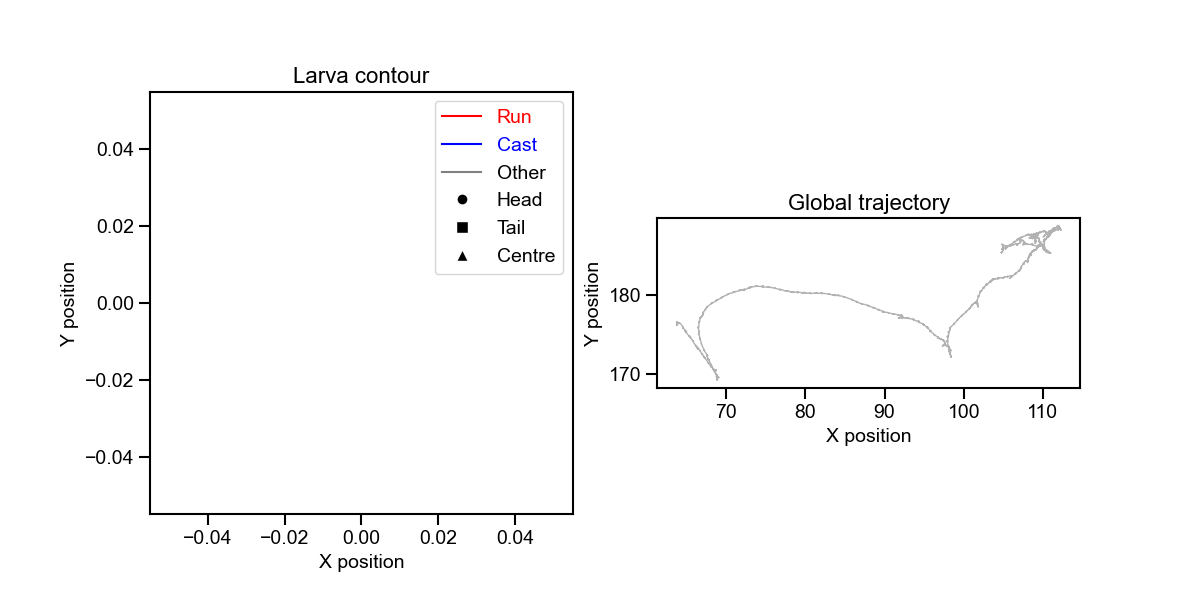

In [91]:
first_larva = sorted(trx_data['data'].keys())[0]
plot_behavioral_contour_with_global_trajectory(trx_data, first_larva)

## Calculating probability of run v/s cast as a function of orientation

Define upstream as **against the wind** and define downstream as **with the wind** with the assumption that wind is blowing in the positive X-axis direction.

Now define orientation of the body as follows :

- Upstream: -45° to +45°
- Right: +75° to +105°
- Downstream: +135° to -135°
- Left: -105° to -75°

In [330]:
def calculate_orientation_behavior_probability(trx_data, larva_id, initial_frames=12):
    """
    Calculate probabilities of run and cast behaviors based on orientation quadrants.
    Orientation is determined from the first few frames of each behavioral bout.
    
    Args:
        trx_data (dict): Tracking data for all larvae.
        larva_id (str): ID of the larva to analyze.
        initial_frames (int): Number of initial frames to use for orientation calculation.
    
    Returns:
        dict: Probabilities of run and cast behaviors by orientation quadrant.
    """
    larva = trx_data['data'][larva_id]
    
    # Get behavioral states
    run = np.array(larva['run'])
    cast = np.array(larva['cast'])
    
    # Find bout start frames
    run_starts = np.where((run[1:] - run[:-1]) > 0)[0] + 1
    cast_starts = np.where((cast[1:] - cast[:-1]) > 0)[0] + 1
    
    # Extract coordinates
    x_spine = np.array(larva['x_spine'])
    y_spine = np.array(larva['y_spine'])
    x_center = np.array(larva['x_center'])
    y_center = np.array(larva['y_center'])
    
    # Calculate vectors and angles for all frames
    tail_to_center = np.array([
        x_center - x_spine[-1, :],
        y_center - y_spine[-1, :]
    ]).T
    
    center_to_head = np.array([
        x_spine[0, :] - x_center,
        y_spine[0, :] - y_center
    ]).T
    
    orientation_angles = np.degrees(np.arctan2(tail_to_center[:, 1], tail_to_center[:, 0]))
    cast_angles = np.degrees(np.arctan2(center_to_head[:, 1], center_to_head[:, 0]))
    
    # Define quadrant ranges
    quadrants = {
        'upstream': (-15, 15),
        'right': (75, 105),
        'downstream': (-180, -165, 165, 180),
        'left': (-105, -75),
        'ambiguous': ()
    }
    
    # Initialize counters
    counts = {quad: {'total': 0, 'run': 0, 'upstream_cast': 0, 'downstream_cast': 0} 
             for quad in quadrants}
    
    # Process run bouts
    for start in run_starts:
        # Calculate mean orientation over initial frames
        end = min(start + initial_frames, len(orientation_angles))
        mean_angle = np.mean(orientation_angles[start:end])
        
        # Determine quadrant
        if -15 <= mean_angle <= 15:
            quad = 'upstream'
        elif 75 <= mean_angle <= 105:
            quad = 'right'
        elif mean_angle > 1 or mean_angle <= -135:
            quad = 'downstream'
        elif -105 <= mean_angle <= -75:
            quad = 'left'
        else:
            quad = 'ambiguous'
        
        counts[quad]['total'] += 1
        counts[quad]['run'] += 1
    
    # Process cast bouts
    for start in cast_starts:
        # Calculate mean orientation over initial frames
        end = min(start + initial_frames, len(orientation_angles))
        mean_angle = np.mean(orientation_angles[start:end])
        cast_angle = np.mean(cast_angles[start:end])
        
        # Determine quadrant
        if -45 <= mean_angle <= 45:
            quad = 'upstream'
        elif 75 <= mean_angle <= 105:
            quad = 'right'
        elif mean_angle > 135 or mean_angle <= -135:
            quad = 'downstream'
        elif -105 <= mean_angle <= -75:
            quad = 'left'
        else:
            quad = 'ambiguous'
        
        counts[quad]['total'] += 1
        
        # Classify cast direction
        if -90 <= cast_angle <= 90:  # Head pointing downstream
            counts[quad]['downstream_cast'] += 1
        else:  # Head pointing upstream
            counts[quad]['upstream_cast'] += 1
    
    # Calculate probabilities
    probabilities = {}
    for quad in quadrants:
        total = counts[quad]['total']
        if total > 0:
            probabilities[quad] = {
                'run': counts[quad]['run'] / total,
                'cast': (counts[quad]['upstream_cast'] + counts[quad]['downstream_cast']) / total,
                'upstream_cast': counts[quad]['upstream_cast'] / total,
                'downstream_cast': counts[quad]['downstream_cast'] / total
            }
        else:
            probabilities[quad] = {
                'run': 0, 'cast': 0,
                'upstream_cast': 0, 'downstream_cast': 0
            }
    
    return probabilities

In [331]:
def analyze_and_plot_orientation_behaviors(trx_data, index_frames = 100):
    """
    Analyze and plot orientation behaviors with violin plots and statistics.
    Shows significance testing between orientations within each behavior type.
    """
    # Initialize data structures with angle ranges
    orientation_labels = {
        'upstream': 'upstream\n(-45° to +45°)',
        'right': 'right\n(+75° to +105°)',
        'downstream': 'downstream\n(-135° to +135°)',
        'left': 'left\n(-105° to -75°)'
    }
    orientations = ['upstream', 'right', 'downstream', 'left']
    behaviors = ['run', 'cast']
    
    # Initialize data dictionary
    violin_data = {behavior: {ori: [] for ori in orientations} for behavior in behaviors}
    
    # Collect probabilities for each larva
    for larva_id in trx_data['data'].keys():
        probs = calculate_orientation_behavior_probability(trx_data, larva_id, index_frames)
        for ori in orientations:
            for behavior in behaviors:
                violin_data[behavior][ori].append(probs[ori][behavior])
    
    # Create figure
    fig, ax = plt.subplots(figsize=(8,6))
    
    # Define colors and offsets
    colors = {'run': 'red', 'cast': 'blue'}
    offsets = {'run': -0.2, 'cast': 0.2}
    
    # Plot violins
    positions = np.arange(len(orientations))
    violin_parts = {}
    for behavior in behaviors:
        violin_parts[behavior] = ax.violinplot(
            [violin_data[behavior][ori] for ori in orientations],
            positions=positions + offsets[behavior],
            widths=0.3
        )
        # Style violins
        for pc in violin_parts[behavior]['bodies']:
            pc.set_facecolor(colors[behavior])
            pc.set_alpha(0.6)
        for partname in ['cbars', 'cmins', 'cmaxes']:
            violin_parts[behavior][partname].set_edgecolor(colors[behavior])
    
    # Add scatter points
    for i, ori in enumerate(orientations):
        for behavior in behaviors:
            ax.scatter(
                np.full_like(violin_data[behavior][ori], i + offsets[behavior]) +
                np.random.normal(0, 0.02, size=len(violin_data[behavior][ori])),
                violin_data[behavior][ori],
                color=colors[behavior],
                alpha=0.3,
                s=20
            )
    
    # Statistical testing function
    def test_significance(data1, data2, label1, label2):
        t_stat, p_val = stats.ttest_ind(data1, data2)
        print(f"\nComparison: {label1} vs {label2}")
        print(f"t-statistic: {t_stat:.3f}")
        print(f"p-value: {p_val:.3e}")
        return p_val
    
    print("\nStatistical Test Results:")
    print("========================")
    
    # Collect all significant comparisons
    significance_tests = []
    
    # Test between orientations for each behavior
    for behavior in behaviors:
        print(f"\n{behavior.upper()} - Between orientation comparisons:")
        for i, ori1 in enumerate(orientations):
            for j, ori2 in enumerate(orientations[i+1:], i+1):
                p_val = test_significance(
                    violin_data[behavior][ori1],
                    violin_data[behavior][ori2],
                    f"{behavior} ({ori1})",
                    f"{behavior} ({ori2})"
                )
                if p_val < 0.05:
                    significance_tests.append({
                        'x1': i + offsets[behavior],
                        'x2': j + offsets[behavior],
                        'p_val': p_val,
                        'color': colors[behavior],
                        'y_offset': len(significance_tests) * 0.1,
                        'behavior': behavior
                    })
    
    # Sort significance tests by behavior and p-value
    significance_tests.sort(key=lambda x: (x['behavior'] != 'run', x['p_val']))
    
    # Plot significance bars
    y_max = max([max(max(violin_data[beh][ori]) for ori in orientations) 
                 for beh in behaviors])
    base_height = y_max + 0.1
    
    # Plot significance bars with different heights
    for test in significance_tests:
        y_level = base_height + test['y_offset']
        x1, x2 = test['x1'], test['x2']
        
        # Draw significance bar
        ax.plot([x1, x1, x2, x2], 
                [y_level, y_level + 0.05, y_level + 0.05, y_level],
                color=test['color'], linewidth=1)
        
        # Add significance symbol
        if test['p_val'] < 0.001:
            symbol = '***'
        elif test['p_val'] < 0.01:
            symbol = '**'
        else:
            symbol = '*'
        
        ax.text((x1 + x2)/2, y_level + 0.05, symbol,
                ha='center', va='bottom', color=test['color'])
    
    # Customize plot
    ax.set_xticks(positions)
    ax.set_xticklabels([orientation_labels[ori] for ori in orientations])
    ax.set_xlabel('Orientation')
    ax.set_ylabel('Probability')
    ax.set_ylim(-0.2, 2)
    ax.set_title('Behavioral Probabilities by Orientation Quadrant')
    
    
    # Create custom legend with correct colors
    legend_elements = [
        plt.Line2D([0], [0], color=colors['run'], marker='o', 
                   label='Run', markersize=10, linestyle='none', alpha=0.6),
        plt.Line2D([0], [0], color=colors['cast'], marker='o', 
                   label='Cast', markersize=10, linestyle='none', alpha=0.6)
    ]
    ax.legend(handles=legend_elements, loc='upper right')
    
    plt.tight_layout()
    plt.show()


Statistical Test Results:

RUN - Between orientation comparisons:

Comparison: run (upstream) vs run (right)
t-statistic: -0.785
p-value: 4.368e-01

Comparison: run (upstream) vs run (downstream)
t-statistic: -9.901
p-value: 9.065e-13

Comparison: run (upstream) vs run (left)
t-statistic: -1.568
p-value: 1.239e-01

Comparison: run (right) vs run (downstream)
t-statistic: -6.767
p-value: 2.510e-08

Comparison: run (right) vs run (left)
t-statistic: -0.572
p-value: 5.703e-01

Comparison: run (downstream) vs run (left)
t-statistic: 6.703
p-value: 3.119e-08

CAST - Between orientation comparisons:

Comparison: cast (upstream) vs cast (right)
t-statistic: 0.785
p-value: 4.368e-01

Comparison: cast (upstream) vs cast (downstream)
t-statistic: 9.901
p-value: 9.065e-13

Comparison: cast (upstream) vs cast (left)
t-statistic: 2.097
p-value: 4.180e-02

Comparison: cast (right) vs cast (downstream)
t-statistic: 6.767
p-value: 2.510e-08

Comparison: cast (right) vs cast (left)
t-statistic: 1.087


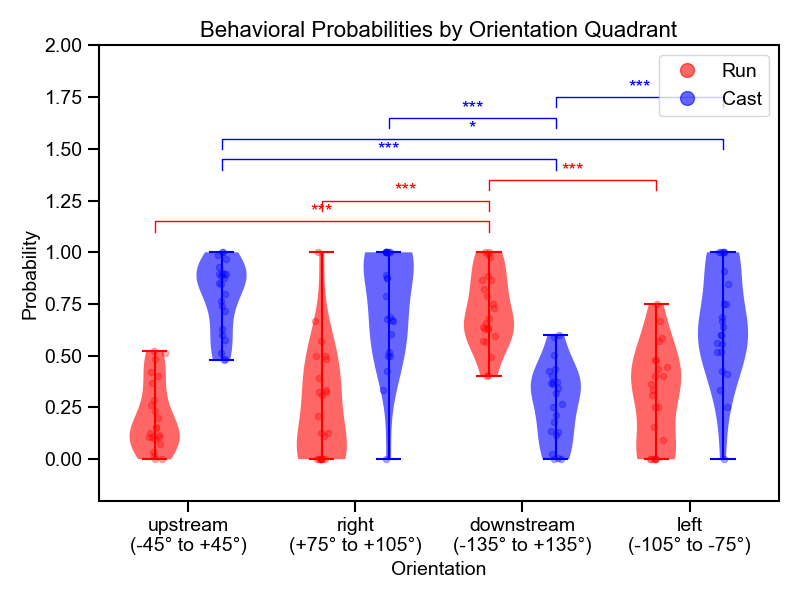

In [333]:
analyze_and_plot_orientation_behaviors(filtered_trx_data)

## Calculating probability of run v/s upstream cast v/s downstream cast as a function of orientation

Define upstream as **against the wind** and define downstream as **with the wind** with the assumption that wind is blowing in the positive X-axis direction.

Same definition of orientation of the body as follows :

- Upstream: -45° to +45°
- Right: +75° to +105°
- Downstream: +135° to -135°
- Left: -105° to -75°

In [309]:
def calculate_orientation_behavior_probability(trx_data, larva_id, initial_frames=100):
    """
    Calculate probabilities of run and cast behaviors based on orientation quadrants.
    Orientation is determined from the initial frames of each behavioral bout.
    
    Args:
        trx_data (dict): Tracking data for all larvae.
        larva_id (str): ID of the larva to analyze.
        initial_frames (int): Number of initial frames to use for orientation.
    
    Returns:
        dict: Probabilities of behaviors by orientation quadrant.
    """
    larva = trx_data['data'][larva_id]
    
    # Get behavioral states
    run = np.array(larva['run'])
    cast = np.array(larva['cast'])
    
    # Find behavioral bout transitions
    run_starts = np.where((run[1:] - run[:-1]) > 0)[0] + 1
    cast_starts = np.where((cast[1:] - cast[:-1]) > 0)[0] + 1
    
    # Extract coordinates
    x_spine = np.array(larva['x_spine'])
    y_spine = np.array(larva['y_spine'])
    x_center = np.array(larva['x_center'])
    y_center = np.array(larva['y_center'])
    
    # Calculate orientation vectors
    tail_to_center = np.array([
        x_center - x_spine[-1, :],
        y_center - y_spine[-1, :]
    ]).T
    
    center_to_head = np.array([
        x_spine[0, :] - x_center,
        y_spine[0, :] - y_center
    ]).T
    
    # Calculate angles
    orientation_angles = np.degrees(np.arctan2(tail_to_center[:, 1], tail_to_center[:, 0]))
    cast_angles = np.degrees(np.arctan2(center_to_head[:, 1], center_to_head[:, 0]))
    
    # Define quadrant ranges
    quadrants = {
        'upstream': (-45, 45),
        'right': (75, 105),
        'downstream': (-180, -135, 135, 180),
        'left': (-105, -75),
        'ambiguous': ()
    }
    
    # Initialize counters
    counts = {quad: {'total': 0, 'run': 0, 'upstream_cast': 0, 'downstream_cast': 0} 
             for quad in quadrants}
    
    def get_quadrant(angle):
        if -45 <= angle <= 45:
            return 'upstream'
        elif 75 <= angle <= 105:
            return 'right'
        elif angle > 135 or angle <= -135:
            return 'downstream'
        elif -105 <= angle <= -75:
            return 'left'
        return 'ambiguous'
    
    # Process run bouts
    for start in run_starts:
        end = min(start + initial_frames, len(orientation_angles))
        mean_angle = np.mean(orientation_angles[start:end])
        quad = get_quadrant(mean_angle)
        
        counts[quad]['total'] += 1
        counts[quad]['run'] += 1
    
    # Process cast bouts
    for start in cast_starts:
        end = min(start + initial_frames, len(orientation_angles))
        mean_orientation = np.mean(orientation_angles[start:end])
        mean_cast = np.mean(cast_angles[start:end])
        quad = get_quadrant(mean_orientation)
        
        counts[quad]['total'] += 1
        
        # Classify cast direction based on mean head angle
        if -90 <= mean_cast <= 90:  # Head pointing downstream
            counts[quad]['downstream_cast'] += 1
        else:  # Head pointing upstream
            counts[quad]['upstream_cast'] += 1
    
    # Calculate probabilities
    probabilities = {}
    for quad in quadrants:
        total = counts[quad]['total']
        if total > 0:
            probabilities[quad] = {
                'run': counts[quad]['run'] / total,
                'upstream_cast': counts[quad]['upstream_cast'] / total,
                'downstream_cast': counts[quad]['downstream_cast'] / total
            }
        else:
            probabilities[quad] = {'run': 0, 'upstream_cast': 0, 'downstream_cast': 0}
    
    return probabilities

In [310]:
def analyze_and_plot_orientation_behaviors(trx_data):
    """
    Analyze and plot orientation behaviors with violin plots and print statistical results.
    Shows significance testing between orientations for runs, upstream casts, and downstream casts.
    """
    # Initialize data structures
    orientation_labels = {
        'upstream': 'upstream\n(-45° to +45°)',
        'right': 'right\n(+75° to +105°)',
        'downstream': 'downstream\n(-135° to +135°)',
        'left': 'left\n(-105° to -75°)'
    }
    orientations = ['upstream', 'right', 'downstream', 'left']
    behaviors = ['run', 'upstream_cast', 'downstream_cast']
    
    # Initialize data dictionary
    violin_data = {behavior: {ori: [] for ori in orientations} for behavior in behaviors}
    
    # Collect probabilities for each larva
    for larva_id in trx_data['data'].keys():
        probs = calculate_orientation_behavior_probability(trx_data, larva_id)
        for ori in orientations:
            for behavior in behaviors:
                violin_data[behavior][ori].append(probs[ori][behavior])
    
    # Create figure
    fig, ax = plt.subplots(figsize=(8, 6))
    
    # Plot violins
    positions = np.arange(len(orientations))
    colors = {'run': 'red', 'upstream_cast': 'green', 'downstream_cast': 'blue'}
    offsets = {'run': -0.25, 'upstream_cast': 0, 'downstream_cast': 0.25}
    
    violin_parts = {}
    for behavior in behaviors:
        violin_parts[behavior] = ax.violinplot(
            [violin_data[behavior][ori] for ori in orientations],
            positions=positions + offsets[behavior],
            widths=0.2
        )
        # Style violins
        for pc in violin_parts[behavior]['bodies']:
            pc.set_facecolor(colors[behavior])
            pc.set_alpha(0.6)
        for partname in ['cbars', 'cmins', 'cmaxes']:
            violin_parts[behavior][partname].set_edgecolor(colors[behavior])
        
        # Add scatter points
        for i, ori in enumerate(orientations):
            ax.scatter(
                np.full_like(violin_data[behavior][ori], i + offsets[behavior]) +
                np.random.normal(0, 0.02, size=len(violin_data[behavior][ori])),
                violin_data[behavior][ori],
                color=colors[behavior],
                alpha=0.3,
                s=20
            )
    
    # Statistical testing function
    def test_significance(data1, data2, label1, label2):
        t_stat, p_val = stats.ttest_ind(data1, data2)
        print(f"\nComparison: {label1} vs {label2}")
        print(f"t-statistic: {t_stat:.3f}")
        print(f"p-value: {p_val:.3e}")
        return p_val
    
    print("\nStatistical Test Results:")
    print("========================")
    
    # Collect significant comparisons
    significance_tests = []
    
    # Test between orientations for each behavior
    for behavior in behaviors:
        print(f"\n{behavior.upper()} - Between orientation comparisons:")
        for i, ori1 in enumerate(orientations):
            for j, ori2 in enumerate(orientations[i+1:], i+1):
                p_val = test_significance(
                    violin_data[behavior][ori1],
                    violin_data[behavior][ori2],
                    f"{behavior} ({ori1})",
                    f"{behavior} ({ori2})"
                )
                if p_val < 0.05:
                    significance_tests.append({
                        'x1': i + offsets[behavior],
                        'x2': j + offsets[behavior],
                        'p_val': p_val,
                        'color': colors[behavior],
                        'y_offset': len(significance_tests) * 0.1
                    })
    
    # Sort significance tests by p-value
    significance_tests.sort(key=lambda x: x['p_val'])
    
    # Plot significance bars
    y_max = max([max(max(violin_data[beh][ori]) for ori in orientations) 
                 for beh in behaviors])
    base_height = y_max + 0.1
    
    # Plot significance bars with different heights
    for test in significance_tests:
        y_level = base_height + test['y_offset']
        x1, x2 = test['x1'], test['x2']
        
        # Draw significance bar
        ax.plot([x1, x1, x2, x2], 
                [y_level, y_level + 0.05, y_level + 0.05, y_level],
                color=test['color'], linewidth=1)
        
        # Add significance symbol
        if test['p_val'] < 0.001:
            symbol = '***'
        elif test['p_val'] < 0.01:
            symbol = '**'
        else:
            symbol = '*'
        
        ax.text((x1 + x2)/2, y_level + 0.05, symbol,
                ha='center', va='bottom', color=test['color'])
    
    # Customize plot
    ax.set_xticks(positions)
    ax.set_xticklabels([orientation_labels[ori] for ori in orientations])
    ax.set_xlabel('Orientation')
    ax.set_ylabel('Probability')
    ax.set_ylim(-0.2, base_height + len(significance_tests) * 0.1 + 0.2)
    ax.set_title('Behavioral Probabilities by Orientation Quadrant')
    
    # Create custom legend
    legend_elements = [
        plt.Line2D([0], [0], color=colors['run'], marker='o', 
                   label='Run', markersize=10, linestyle='none', alpha=0.6),
        plt.Line2D([0], [0], color=colors['upstream_cast'], marker='o', 
                   label='Upstream Cast', markersize=10, linestyle='none', alpha=0.6),
        plt.Line2D([0], [0], color=colors['downstream_cast'], marker='o', 
                   label='Downstream Cast', markersize=10, linestyle='none', alpha=0.6)
    ]
    ax.legend(handles=legend_elements, loc='upper right')
    
    plt.tight_layout()
    plt.show()


Statistical Test Results:

RUN - Between orientation comparisons:

Comparison: run (upstream) vs run (right)
t-statistic: 1.658
p-value: 1.048e-01

Comparison: run (upstream) vs run (downstream)
t-statistic: -2.096
p-value: 4.210e-02

Comparison: run (upstream) vs run (left)
t-statistic: 0.767
p-value: 4.475e-01

Comparison: run (right) vs run (downstream)
t-statistic: -3.624
p-value: 7.774e-04

Comparison: run (right) vs run (left)
t-statistic: -0.712
p-value: 4.802e-01

Comparison: run (downstream) vs run (left)
t-statistic: 2.487
p-value: 1.694e-02

UPSTREAM_CAST - Between orientation comparisons:

Comparison: upstream_cast (upstream) vs upstream_cast (right)
t-statistic: -3.653
p-value: 7.131e-04

Comparison: upstream_cast (upstream) vs upstream_cast (downstream)
t-statistic: -5.540
p-value: 1.815e-06

Comparison: upstream_cast (upstream) vs upstream_cast (left)
t-statistic: -2.681
p-value: 1.045e-02

Comparison: upstream_cast (right) vs upstream_cast (downstream)
t-statistic: 0.3

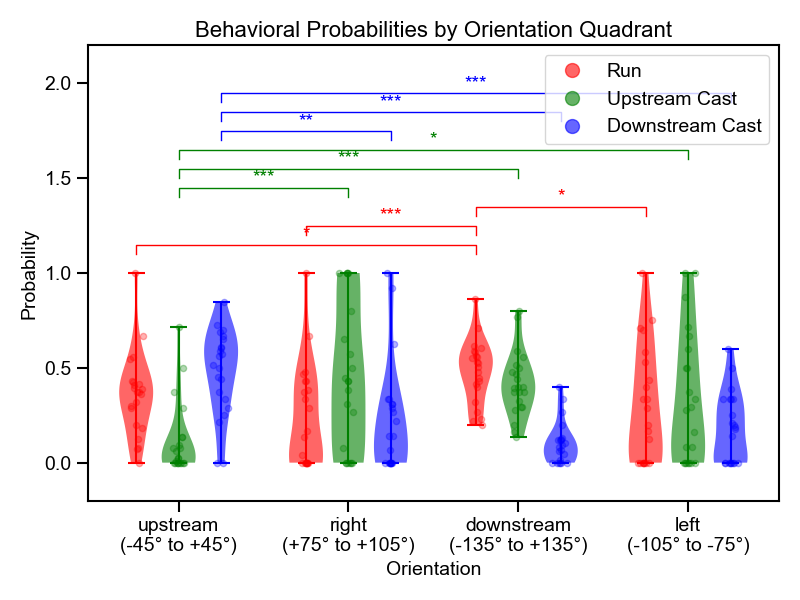

In [311]:
# Analyze and plot orientation behaviors
analyze_and_plot_orientation_behaviors(filtered_trx_data)

## Calculate amplitude of head cast (left or right) as a function of orientation


In [312]:
def calculate_orientation_cast_amplitudes(trx_data, larva_id, initial_frames=100):
    """
    Calculate cast amplitudes based on orientation quadrants.
    Orientation is determined from initial frames of each cast bout.
    
    Args:
        trx_data (dict): Tracking data for all larvae.
        larva_id (str): ID of the larva to analyze.
        initial_frames (int): Number of initial frames to use for orientation.
    
    Returns:
        dict: Lists of upstream and downstream cast amplitudes by orientation quadrant.
    """
    larva = trx_data['data'][larva_id]
    
    # Get cast state and find bout starts
    cast = np.array(larva['cast'])
    cast_starts = np.where((cast[1:] - cast[:-1]) > 0)[0] + 1
    
    # Extract coordinates
    x_spine = np.array(larva['x_spine'])
    y_spine = np.array(larva['y_spine'])
    x_center = np.array(larva['x_center'])
    y_center = np.array(larva['y_center'])
    
    # Calculate vectors
    tail_to_center = np.array([
        x_center - x_spine[-1, :],
        y_center - y_spine[-1, :]
    ]).T
    
    center_to_head = np.array([
        x_spine[0, :] - x_center,
        y_spine[0, :] - y_center
    ]).T
    
    # Calculate angles
    orientation_angles = np.degrees(np.arctan2(tail_to_center[:, 1], tail_to_center[:, 0]))
    cast_angles = np.degrees(np.arctan2(center_to_head[:, 1], center_to_head[:, 0]))
    
    def get_quadrant(angle):
        """Determine orientation quadrant based on angle."""
        if -45 <= angle <= 45:
            return 'upstream'
        elif 75 <= angle <= 105:
            return 'right'
        elif angle > 135 or angle <= -135:
            return 'downstream'
        elif -105 <= angle <= -75:
            return 'left'
        return 'ambiguous'
    
    # Initialize results dictionary
    amplitudes = {
        'upstream': {'upstream_cast': [], 'downstream_cast': []},
        'right': {'upstream_cast': [], 'downstream_cast': []},
        'downstream': {'upstream_cast': [], 'downstream_cast': []},
        'left': {'upstream_cast': [], 'downstream_cast': []},
        'ambiguous': {'upstream_cast': [], 'downstream_cast': []}
    }
    
    # Process each cast bout
    for start in cast_starts:
        # Calculate mean orientation from initial frames
        end = min(start + initial_frames, len(orientation_angles))
        mean_orientation = np.mean(orientation_angles[start:end])
        quad = get_quadrant(mean_orientation)
        
        # Find all frames in this cast bout
        if start == cast_starts[-1]:
            bout_frames = np.arange(start, len(cast))
        else:
            bout_frames = np.arange(start, cast_starts[np.where(cast_starts > start)[0][0]])
        
        # Process each frame in the bout
        for frame in bout_frames:
            cast_angle = cast_angles[frame]
            
            # Calculate cast amplitude
            amplitude = np.abs(cast_angle - orientation_angles[frame])
            if amplitude > 180:
                amplitude = 360 - amplitude
            
            # Classify cast direction and store amplitude
            if -90 <= cast_angle <= 90:  # Head pointing downstream
                amplitudes[quad]['downstream_cast'].append(amplitude)
            else:  # Head pointing upstream
                amplitudes[quad]['upstream_cast'].append(amplitude)
    
    return amplitudes

In [313]:
def analyze_and_print_amplitude_statistics(violin_data, orientations, cast_types):
    """
    Perform comprehensive statistical analysis of cast amplitudes.
    """
    print("\nStatistical Analysis of Cast Amplitudes")
    print("=====================================")
    
    # 1. Compare upstream vs downstream casts within each orientation
    print("\n1. Within-orientation comparisons (Upstream vs Downstream casts):")
    print("-----------------------------------------------------------")
    for ori in orientations:
        up_data = violin_data['upstream_cast'][ori]
        down_data = violin_data['downstream_cast'][ori]
        if len(up_data) > 0 and len(down_data) > 0:
            t_stat, p_val = stats.ttest_ind(up_data, down_data)
            print(f"\nOrientation: {ori}")
            print(f"Upstream cast mean ± std: {np.mean(up_data):.2f} ± {np.std(up_data):.2f}")
            print(f"Downstream cast mean ± std: {np.mean(down_data):.2f} ± {np.std(down_data):.2f}")
            print(f"t-statistic: {t_stat:.3f}")
            print(f"p-value: {p_val:.3e}")
    
    # 2. Compare orientations for each cast type
    print("\n2. Between-orientation comparisons:")
    print("--------------------------------")
    for cast_type in cast_types:
        print(f"\nCast type: {cast_type}")
        for i, ori1 in enumerate(orientations):
            for j, ori2 in enumerate(orientations[i+1:], i+1):
                data1 = violin_data[cast_type][ori1]
                data2 = violin_data[cast_type][ori2]
                if len(data1) > 0 and len(data2) > 0:
                    t_stat, p_val = stats.ttest_ind(data1, data2)
                    print(f"\n{ori1} vs {ori2}:")
                    print(f"{ori1} mean ± std: {np.mean(data1):.2f} ± {np.std(data1):.2f}")
                    print(f"{ori2} mean ± std: {np.mean(data2):.2f} ± {np.std(data2):.2f}")
                    print(f"t-statistic: {t_stat:.3f}")
                    print(f"p-value: {p_val:.3e}")
    
    # 3. Additional descriptive statistics
    print("\n3. Overall descriptive statistics:")
    print("--------------------------------")
    for cast_type in cast_types:
        print(f"\n{cast_type}:")
        for ori in orientations:
            data = violin_data[cast_type][ori]
            if len(data) > 0:
                print(f"\n{ori}:")
                print(f"N = {len(data)}")
                print(f"Mean ± SEM: {np.mean(data):.2f} ± {stats.sem(data):.2f}")
                print(f"Median: {np.median(data):.2f}")
                print(f"25th percentile: {np.percentile(data, 25):.2f}")
                print(f"75th percentile: {np.percentile(data, 75):.2f}")

In [314]:
def analyze_and_plot_cast_amplitudes(trx_data):
    """
    Analyze and plot cast amplitudes with violin plots and statistical significance.
    """
    # Initialize data structures
    orientations = ['upstream', 'right', 'downstream', 'left']
    cast_types = ['upstream_cast', 'downstream_cast']
    
    # Initialize data dictionary
    violin_data = {cast_type: {ori: [] for ori in orientations} for cast_type in cast_types}
    
    # Collect amplitudes for each larva
    for larva_id in trx_data['data'].keys():
        amps = calculate_orientation_cast_amplitudes(trx_data, larva_id)
        for ori in orientations:
            for cast_type in cast_types:
                violin_data[cast_type][ori].extend(amps[ori][cast_type])
    
    # Create figure
    fig, ax = plt.subplots(figsize=(8, 6))
    
    # Define colors and offsets
    colors = {'upstream_cast': 'green', 'downstream_cast': 'blue'}
    offsets = {'upstream_cast': -0.2, 'downstream_cast': 0.2}
    
    # Plot violins
    positions = np.arange(len(orientations))
    violin_parts = {}
    for cast_type in cast_types:
        violin_parts[cast_type] = ax.violinplot(
            [violin_data[cast_type][ori] for ori in orientations],
            positions=positions + offsets[cast_type],
            widths=0.3
        )
        # Style violins
        for pc in violin_parts[cast_type]['bodies']:
            pc.set_facecolor(colors[cast_type])
            pc.set_alpha(0.6)
        for partname in ['cbars', 'cmins', 'cmaxes']:
            violin_parts[cast_type][partname].set_edgecolor(colors[cast_type])
    
    # Add scatter points
    for i, ori in enumerate(orientations):
        for cast_type in cast_types:
            ax.scatter(
                np.full_like(violin_data[cast_type][ori], i + offsets[cast_type]) +
                np.random.normal(0, 0.02, size=len(violin_data[cast_type][ori])),
                violin_data[cast_type][ori],
                color=colors[cast_type],
                alpha=0.3,
                s=20
            )
    
    # Collect significance tests
    significance_tests = []
    
    # Test between upstream and downstream casts within each orientation
    print("\nWithin-orientation comparisons:")
    for i, ori in enumerate(orientations):
        up_data = violin_data['upstream_cast'][ori]
        down_data = violin_data['downstream_cast'][ori]
        if len(up_data) > 0 and len(down_data) > 0:
            t_stat, p_val = stats.ttest_ind(up_data, down_data)
            print(f"\n{ori} - Upstream vs Downstream casts:")
            print(f"p-value: {p_val:.3e}")
            if p_val < 0.05:
                significance_tests.append({
                    'x1': i + offsets['upstream_cast'],
                    'x2': i + offsets['downstream_cast'],
                    'p_val': p_val,
                    'color': 'black',
                    'y_offset': len(significance_tests) * 0.1,
                    'type': 'within'
                })
    
    # Test between orientations for each cast type
    print("\nBetween-orientation comparisons:")
    for cast_type in cast_types:
        for i, ori1 in enumerate(orientations):
            for j, ori2 in enumerate(orientations[i+1:], i+1):
                data1 = violin_data[cast_type][ori1]
                data2 = violin_data[cast_type][ori2]
                if len(data1) > 0 and len(data2) > 0:
                    t_stat, p_val = stats.ttest_ind(data1, data2)
                    print(f"\n{cast_type} - {ori1} vs {ori2}:")
                    print(f"p-value: {p_val:.3e}")
                    if p_val < 0.05:
                        significance_tests.append({
                            'x1': i + offsets[cast_type],
                            'x2': j + offsets[cast_type],
                            'p_val': p_val,
                            'color': colors[cast_type],
                            'y_offset': len(significance_tests) * 0.1,
                            'type': 'between'
                        })
    
    # Sort significance tests by p-value
    significance_tests.sort(key=lambda x: (x['type'] != 'within', x['p_val']))
    
    # Plot significance bars
    y_max = max([max(max(violin_data[ct][ori]) for ori in orientations) 
                 for ct in cast_types])
    base_height = y_max + 10
    
    # Plot significance bars with different heights
    for test in significance_tests:
        y_level = base_height + test['y_offset'] * 100
        x1, x2 = test['x1'], test['x2']
        
        # Draw significance bar
        ax.plot([x1, x1, x2, x2], 
                [y_level, y_level + 5, y_level + 5, y_level],
                color=test['color'], linewidth=1)
        
        # Add significance symbol
        if test['p_val'] < 0.001:
            symbol = '***'
        elif test['p_val'] < 0.01:
            symbol = '**'
        else:
            symbol = '*'
        
        ax.text((x1 + x2)/2, y_level + 5, symbol,
                ha='center', va='bottom', color=test['color'])
    
    # Customize plot
    ax.set_xticks(positions)
    ax.set_xticklabels(orientations)
    ax.set_ylabel('Cast Amplitude (degrees)')
    ax.set_ylim(-50,250)
    ax.set_title('Cast Amplitudes by Orientation Quadrant')
    
    # Create custom legend
    legend_elements = [
        plt.Line2D([0], [0], color=colors['upstream_cast'], marker='o', 
                   label='Upstream Cast', markersize=10, linestyle='none', alpha=0.6),
        plt.Line2D([0], [0], color=colors['downstream_cast'], marker='o', 
                   label='Downstream Cast', markersize=10, linestyle='none', alpha=0.6)
    ]
    ax.legend(handles=legend_elements, loc='upper right')
    
    plt.tight_layout()
    plt.show()

In [315]:
def calculate_orientation_cast_amplitudes(trx_data, larva_id, initial_frames=100):
    """
    Calculate cast amplitudes based on orientation quadrants.
    Orientation is determined from initial frames of each cast bout.
    
    Args:
        trx_data (dict): Tracking data for all larvae.
        larva_id (str): ID of the larva to analyze.
        initial_frames (int): Number of initial frames to use for orientation.
    
    Returns:
        dict: Lists of upstream and downstream cast amplitudes by orientation quadrant.
    """
    larva = trx_data['data'][larva_id]
    
    # Get cast state and find bout starts
    cast = np.array(larva['cast'])
    cast_starts = np.where((cast[1:] - cast[:-1]) > 0)[0] + 1
    
    # Extract coordinates
    x_spine = np.array(larva['x_spine'])
    y_spine = np.array(larva['y_spine'])
    x_center = np.array(larva['x_center'])
    y_center = np.array(larva['y_center'])
    
    # Calculate vectors
    tail_to_center = np.array([
        x_center - x_spine[-1, :],
        y_center - y_spine[-1, :]
    ]).T
    
    center_to_head = np.array([
        x_spine[0, :] - x_center,
        y_spine[0, :] - y_center
    ]).T
    
    # Calculate angles
    orientation_angles = np.degrees(np.arctan2(tail_to_center[:, 1], tail_to_center[:, 0]))
    cast_angles = np.degrees(np.arctan2(center_to_head[:, 1], center_to_head[:, 0]))
    
    def get_quadrant(angle):
        """Determine orientation quadrant based on angle."""
        if -45 <= angle <= 45:
            return 'upstream'
        elif 75 <= angle <= 105:
            return 'right'
        elif angle > 135 or angle <= -135:
            return 'downstream'
        elif -105 <= angle <= -75:
            return 'left'
        return 'ambiguous'
    
    # Initialize results dictionary
    amplitudes = {
        'upstream': {'upstream_cast': [], 'downstream_cast': []},
        'right': {'upstream_cast': [], 'downstream_cast': []},
        'downstream': {'upstream_cast': [], 'downstream_cast': []},
        'left': {'upstream_cast': [], 'downstream_cast': []},
        'ambiguous': {'upstream_cast': [], 'downstream_cast': []}
    }
    
    # Process each cast bout
    for start in cast_starts:
        # Calculate mean orientation from initial frames
        end = min(start + initial_frames, len(orientation_angles))
        mean_orientation = np.mean(orientation_angles[start:end])
        quad = get_quadrant(mean_orientation)
        
        # Find all frames in this cast bout
        if start == cast_starts[-1]:
            bout_frames = np.arange(start, len(cast))
        else:
            bout_frames = np.arange(start, cast_starts[np.where(cast_starts > start)[0][0]])
        
        # Process each frame in the bout
        for frame in bout_frames:
            cast_angle = cast_angles[frame]
            
            # Calculate cast amplitude
            amplitude = np.abs(cast_angle - orientation_angles[frame])
            if amplitude > 180:
                amplitude = 360 - amplitude
            
            # Classify cast direction and store amplitude
            if -90 <= cast_angle <= 90:  # Head pointing downstream
                amplitudes[quad]['downstream_cast'].append(amplitude)
            else:  # Head pointing upstream
                amplitudes[quad]['upstream_cast'].append(amplitude)
    
    return amplitudes

def analyze_and_plot_cast_amplitudes(trx_data):
    """
    Analyze and plot cast amplitudes with violin plots.
    Shows significance testing between orientations for each cast type.
    """
    # Setup
    orientation_labels = {
        'upstream': 'upstream\n(-45° to +45°)',
        'right': 'right\n(+75° to +105°)',
        'downstream': 'downstream\n(±135° to ±180°)',
        'left': 'left\n(-105° to -75°)'
    }
    orientations = ['upstream', 'right', 'downstream', 'left']
    cast_types = ['upstream_cast', 'downstream_cast']
    colors = {'upstream_cast': 'green', 'downstream_cast': 'blue'}
    offsets = {'upstream_cast': -0.2, 'downstream_cast': 0.2}
    
    # Collect data per larva
    larva_data = {cast_type: {ori: {} for ori in orientations} 
                  for cast_type in cast_types}
    
    # All cast data for plotting
    all_cast_data = {cast_type: {ori: [] for ori in orientations} 
                     for cast_type in cast_types}
    
    # Collect amplitudes
    for larva_id in trx_data['data'].keys():
        amps = calculate_orientation_cast_amplitudes(trx_data, larva_id)
        for ori in orientations:
            for cast_type in cast_types:
                # Store all casts for plotting
                all_cast_data[cast_type][ori].extend(amps[ori][cast_type])
                # Store mean for each larva for statistics
                if len(amps[ori][cast_type]) > 0:
                    larva_data[cast_type][ori][larva_id] = np.mean(amps[ori][cast_type])
    
    # Create figure
    fig, ax = plt.subplots(figsize=(8, 6))
    positions = np.arange(len(orientations))
    
    # Plot violins and statistics
    violin_parts = {}
    for cast_type in cast_types:
        # Plot violin using all cast data
        violin_parts[cast_type] = ax.violinplot(
            [all_cast_data[cast_type][ori] for ori in orientations],
            positions=positions + offsets[cast_type],
            widths=0.3
        )
        
        # Style violins
        for pc in violin_parts[cast_type]['bodies']:
            pc.set_facecolor(colors[cast_type])
            pc.set_alpha(0.3)
        for partname in ['cbars', 'cmins', 'cmaxes']:
            violin_parts[cast_type][partname].set_edgecolor(colors[cast_type])
        
        # Add median and quartile markers for each orientation
        for i, ori in enumerate(orientations):
            data = all_cast_data[cast_type][ori]
            if len(data) > 0:
                median = np.median(data)
                quartiles = np.percentile(data, [25, 75])
                
                # Plot median
                ax.plot(i + offsets[cast_type], median, 'o',
                       color=colors[cast_type], markersize=8)
                # Plot quartiles
                ax.vlines(i + offsets[cast_type], quartiles[0], quartiles[1],
                         color=colors[cast_type], linewidth=2)
    
    # Statistical testing function
    def test_significance(data1, data2, label1, label2):
        if len(data1) > 0 and len(data2) > 0:
            t_stat, p_val = stats.ttest_ind(data1, data2)
            print(f"\nComparison: {label1} vs {label2}")
            print(f"t-statistic: {t_stat:.3f}")
            print(f"p-value: {p_val:.3e}")
            return p_val
        return 1.0
    
    # Statistical testing using larval averages
    significance_tests = []
    print("\nStatistical Analysis (using larval averages):")
    print("=========================================")
    
    # Test between orientations for each cast type
    for cast_type in cast_types:
        print(f"\n{cast_type.upper()} - Between orientation comparisons:")
        for i, ori1 in enumerate(orientations):
            for j, ori2 in enumerate(orientations[i+1:], i+1):
                data1 = list(larva_data[cast_type][ori1].values())
                data2 = list(larva_data[cast_type][ori2].values())
                
                p_val = test_significance(
                    data1, data2,
                    f"{cast_type} ({ori1})",
                    f"{cast_type} ({ori2})"
                )
                
                if p_val < 0.05:
                    significance_tests.append({
                        'x1': i + offsets[cast_type],
                        'x2': j + offsets[cast_type],
                        'p_val': p_val,
                        'color': colors[cast_type],
                        'y_offset': len(significance_tests) * 10
                    })
    
    # Sort significance tests by cast type and p-value
    significance_tests.sort(key=lambda x: (x['color'] == colors['downstream_cast'], x['p_val']))
    
    # Plot significance bars
    y_max = max([max(max(all_cast_data[ct][ori]) for ori in orientations) 
                 for ct in cast_types])
    base_height = y_max + 10
    
    # Plot significance bars with different heights
    for test in significance_tests:
        y_level = base_height + test['y_offset']
        x1, x2 = test['x1'], test['x2']
        
        # Draw significance bar
        ax.plot([x1, x1, x2, x2], 
                [y_level, y_level + 5, y_level + 5, y_level],
                color=test['color'], linewidth=1)
        
        # Add significance symbol
        if test['p_val'] < 0.001:
            symbol = '***'
        elif test['p_val'] < 0.01:
            symbol = '**'
        else:
            symbol = '*'
        
        ax.text((x1 + x2)/2, y_level + 5, symbol,
                ha='center', va='bottom', color=test['color'])
    
    # Customize plot
    ax.set_xticks(positions)
    ax.set_xticklabels([orientation_labels[ori] for ori in orientations])
    ax.set_xlabel('Orientation')
    ax.set_ylabel('Cast Amplitude (degrees)')
    ax.set_ylim(-10, base_height + len(significance_tests) * 10 + 20)
    ax.set_title('Cast Amplitudes by Orientation Quadrant')
    
    # Create legend
    legend_elements = [
        plt.Line2D([0], [0], color=colors['upstream_cast'], marker='o', 
                   label='Upstream Cast', markersize=8, linestyle='-', alpha=0.6),
        plt.Line2D([0], [0], color=colors['downstream_cast'], marker='o', 
                   label='Downstream Cast', markersize=8, linestyle='-', alpha=0.6)
    ]
    ax.legend(handles=legend_elements, loc='upper right')
    
    plt.tight_layout()
    plt.show()


Statistical Analysis (using larval averages):

UPSTREAM_CAST - Between orientation comparisons:

Comparison: upstream_cast (upstream) vs upstream_cast (right)
t-statistic: 1.110
p-value: 2.745e-01

Comparison: upstream_cast (upstream) vs upstream_cast (downstream)
t-statistic: 4.553
p-value: 5.301e-05

Comparison: upstream_cast (upstream) vs upstream_cast (left)
t-statistic: 3.244
p-value: 2.697e-03

Comparison: upstream_cast (right) vs upstream_cast (downstream)
t-statistic: 3.073
p-value: 3.853e-03

Comparison: upstream_cast (right) vs upstream_cast (left)
t-statistic: 2.035
p-value: 4.969e-02

Comparison: upstream_cast (downstream) vs upstream_cast (left)
t-statistic: -0.778
p-value: 4.413e-01

DOWNSTREAM_CAST - Between orientation comparisons:

Comparison: downstream_cast (upstream) vs downstream_cast (right)
t-statistic: 0.532
p-value: 5.986e-01

Comparison: downstream_cast (upstream) vs downstream_cast (downstream)
t-statistic: -5.347
p-value: 1.199e-05

Comparison: downstream_c

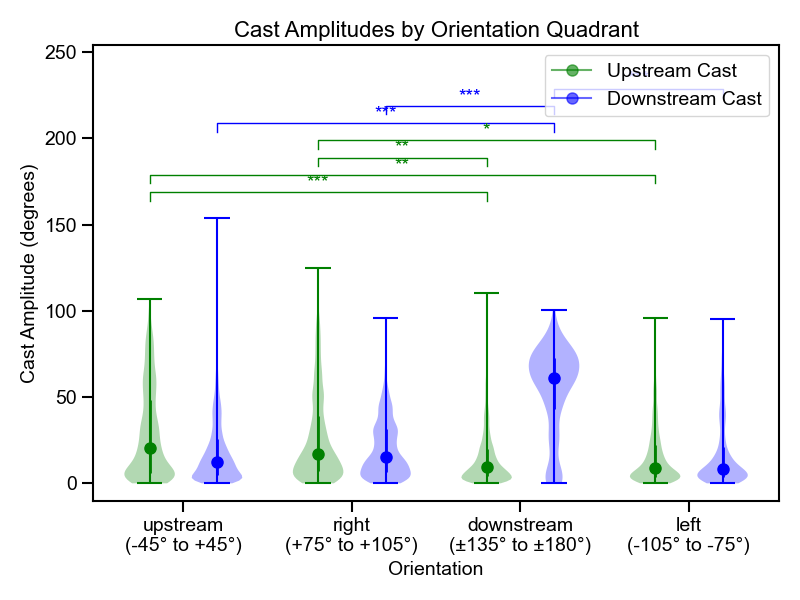

In [316]:
analyze_and_plot_cast_amplitudes(filtered_trx_data)